In [1]:
dados ='/home/dev/PycharmProjects/FallDetection/conv/mobiact/Conv1d/Dominio da Frequencia/dados_freq.npy'
rotulos ='/home/dev/PycharmProjects/FallDetection/conv/mobiact/rotulos_freq.npy'

import numpy as np
X = np.load(dados)
y = np.load(rotulos)


In [2]:
def rede_MLP(X,y,i):

    from sklearn.model_selection import train_test_split

    # Dividindo os dados em conjunto de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

    # Dividindo o conjunto de treinamento em conjunto de treinamento e validação
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)
    
    X_train.tolist()
    y_train.tolist()
    X_test.tolist()
    y_test.tolist()
    X_val.tolist()
    y_val.tolist()

    from keras.utils import to_categorical
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    y_val = to_categorical(y_val)

    

    from keras.models import Sequential
    from keras.layers import Dense, Activation, Dropout


    model = Sequential()
    model.add(Dense(215, input_dim=200, kernel_initializer='normal',activation="relu"))
    model.add(Dropout(0.4))
    model.add(Dense(215, kernel_initializer='normal',activation="relu"))
    model.add(Dropout(0.4))
    model.add(Dense(215, kernel_initializer='normal',activation="relu"))
    model.add(Dropout(0.4))
    model.add(Dense(215, kernel_initializer='normal',activation="relu"))
    model.add(Dropout(0.4))
    model.add(Dense(215, kernel_initializer='normal',activation="relu"))
    model.add(Dropout(0.4))
    model.add(Dense(2, kernel_initializer='normal',activation="softmax"))
    
    from keras.optimizers import SGD
    otimizador = SGD() 
    model.compile(loss="categorical_crossentropy",optimizer=otimizador,metrics =["acc"])
    historico = model.fit(X_train,y_train, epochs= 150, batch_size = 32, validation_data=(X_val,y_val), verbose = 1)

    
    
    model.summary()

    import matplotlib.pyplot as plt


    acuracia_treino = historico.history['acc'] 
    acuracia_val = historico.history['val_acc']

    epochs = range(1, len(acuracia_treino)+1) 

    plt.plot(epochs,acuracia_treino, "-g", label="Acurácia Dados de Treino") 
    plt.plot(epochs,acuracia_val, "-b", label = "Acurácia Dados de Validação")
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Acurácia')
    plt.show()

    import numpy as np
    import matplotlib.pyplot as plt
    import itertools
    from sklearn.metrics import confusion_matrix

    # Obtendo as probabilidades das classes previstas
    y_pred_probs = model.predict(X_test)

    # Obtendo as classes previstas
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Obtendo as classes reais
    y_true = np.argmax(y_test, axis=1)

    # Calculando a matriz de confusão
    cm = confusion_matrix(y_true, y_pred)

    # Plotando a matriz de confusão
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Matriz de Confusão')
    plt.colorbar()
    tick_marks = np.arange(0, 2)
    plt.xticks(tick_marks, rotation=90)
    plt.yticks(tick_marks)

    # Adicionando os números nas células da matriz
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo Real')
    plt.xlabel('Rótulo Previsto')
    plt.show()

    from sklearn.metrics import classification_report


    target_names = np.arange(0, 2).astype(str)
    print(classification_report(y_true, y_pred, target_names=target_names))
    
    from sklearn.metrics import matthews_corrcoef
    mcc = matthews_corrcoef(y_true, y_pred)
    print(f'MCC = {mcc}')
    
    from sklearn.metrics import roc_curve, roc_auc_score
    # Calcula a AUC
    roc_auc = roc_auc_score(y_true, y_pred)
    # Calcula a curva ROC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    # Plota a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    
    # Salvar o modelo em formato HDF5
    model.save(f'MLP_freq_{i}.h5')






2023-07-27 09:01:48.206429: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-27 09:01:49.756974: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-27 09:01:49.767549: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-27 09:01:54.089085: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-27 09:02:00.801877: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Do

Epoch 1/150
302/302 [==============================] - 2s 3ms/step - loss: 0.2797 - acc: 0.9533 - val_loss: 0.2376 - val_acc: 0.9505
Epoch 2/150
302/302 [==============================] - 1s 3ms/step - loss: 0.2049 - acc: 0.9552 - val_loss: 0.1895 - val_acc: 0.9505
Epoch 3/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1729 - acc: 0.9552 - val_loss: 0.1603 - val_acc: 0.9505
Epoch 4/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1535 - acc: 0.9552 - val_loss: 0.1420 - val_acc: 0.9505
Epoch 5/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1399 - acc: 0.9552 - val_loss: 0.1232 - val_acc: 0.9505
Epoch 6/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1240 - acc: 0.9551 - val_loss: 0.1005 - val_acc: 0.9505
Epoch 7/150
302/302 [==============================] - 1s 3ms/step - loss: 0.0966 - acc: 0.9621 - val_loss: 0.0724 - val_acc: 0.9763
Epoch 8/150
302/302 [==============================] - 1s 3ms/step - 

302/302 [==============================] - 1s 3ms/step - loss: 0.0209 - acc: 0.9928 - val_loss: 0.0192 - val_acc: 0.9932
Epoch 63/150
302/302 [==============================] - 1s 3ms/step - loss: 0.0200 - acc: 0.9929 - val_loss: 0.0285 - val_acc: 0.9913
Epoch 64/150
302/302 [==============================] - 1s 3ms/step - loss: 0.0156 - acc: 0.9938 - val_loss: 0.0330 - val_acc: 0.9913
Epoch 65/150
302/302 [==============================] - 1s 3ms/step - loss: 0.0165 - acc: 0.9944 - val_loss: 0.0287 - val_acc: 0.9916
Epoch 66/150
302/302 [==============================] - 1s 3ms/step - loss: 0.0167 - acc: 0.9929 - val_loss: 0.0317 - val_acc: 0.9922
Epoch 67/150
302/302 [==============================] - 1s 3ms/step - loss: 0.0168 - acc: 0.9937 - val_loss: 0.0249 - val_acc: 0.9922
Epoch 68/150
302/302 [==============================] - 1s 3ms/step - loss: 0.0166 - acc: 0.9937 - val_loss: 0.0514 - val_acc: 0.9885
Epoch 69/150
302/302 [==============================] - 1s 3ms/step - loss:

302/302 [==============================] - 1s 3ms/step - loss: 0.0081 - acc: 0.9971 - val_loss: 0.0575 - val_acc: 0.9894
Epoch 124/150
302/302 [==============================] - 1s 3ms/step - loss: 0.0119 - acc: 0.9955 - val_loss: 0.0511 - val_acc: 0.9876
Epoch 125/150
302/302 [==============================] - 1s 3ms/step - loss: 0.0106 - acc: 0.9966 - val_loss: 0.0431 - val_acc: 0.9885
Epoch 126/150
302/302 [==============================] - 1s 3ms/step - loss: 0.0092 - acc: 0.9969 - val_loss: 0.0504 - val_acc: 0.9888
Epoch 127/150
302/302 [==============================] - 1s 3ms/step - loss: 0.0097 - acc: 0.9968 - val_loss: 0.0465 - val_acc: 0.9888
Epoch 128/150
302/302 [==============================] - 1s 3ms/step - loss: 0.0099 - acc: 0.9967 - val_loss: 0.0545 - val_acc: 0.9894
Epoch 129/150
302/302 [==============================] - 1s 3ms/step - loss: 0.0120 - acc: 0.9956 - val_loss: 0.0413 - val_acc: 0.9897
Epoch 130/150
302/302 [==============================] - 1s 3ms/step 

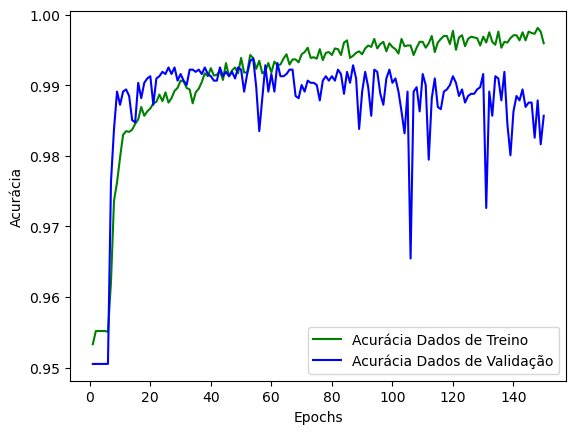

101/101 [==============================] - 0s 906us/step


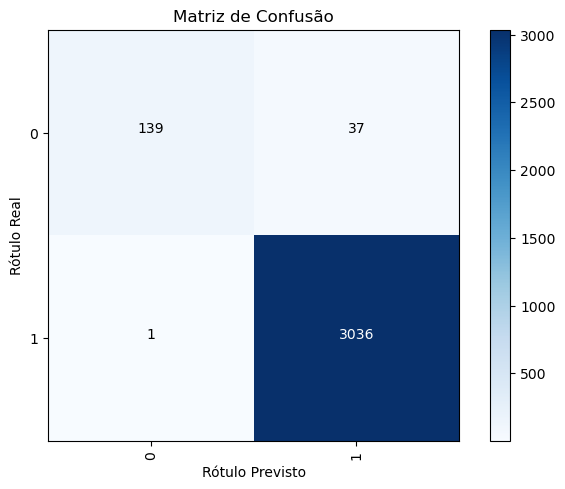

              precision    recall  f1-score   support

           0       0.99      0.79      0.88       176
           1       0.99      1.00      0.99      3037

    accuracy                           0.99      3213
   macro avg       0.99      0.89      0.94      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.879942837062261


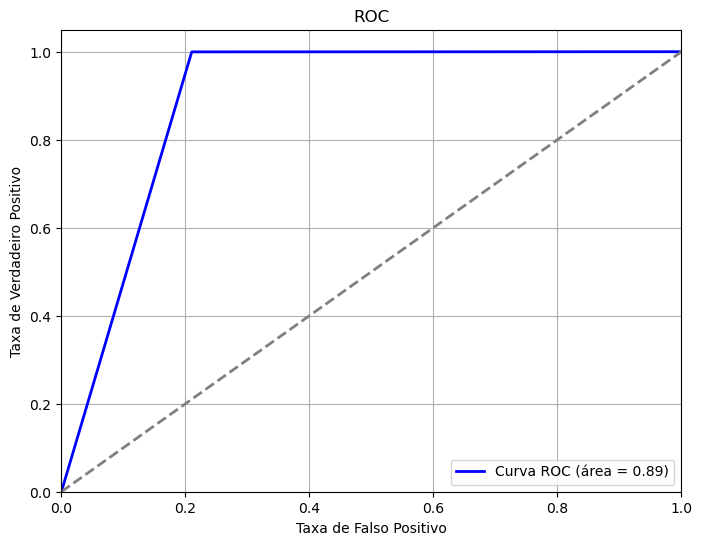

In [3]:
rede_MLP(X,y,1)

Epoch 1/150
302/302 [==============================] - 1s 3ms/step - loss: 0.2919 - acc: 0.9491 - val_loss: 0.2341 - val_acc: 0.9483
Epoch 2/150
302/302 [==============================] - 1s 3ms/step - loss: 0.2129 - acc: 0.9514 - val_loss: 0.1871 - val_acc: 0.9483
Epoch 3/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1825 - acc: 0.9514 - val_loss: 0.1627 - val_acc: 0.9483
Epoch 4/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1653 - acc: 0.9514 - val_loss: 0.1485 - val_acc: 0.9483
Epoch 5/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1520 - acc: 0.9514 - val_loss: 0.1322 - val_acc: 0.9483
Epoch 6/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1372 - acc: 0.9513 - val_loss: 0.1080 - val_acc: 0.9483
Epoch 7/150
302/302 [==============================] - 1s 3ms/step - loss: 0.1117 - acc: 0.9540 - val_loss: 0.0749 - val_acc: 0.9695
Epoch 8/150
302/302 [==============================] - 1s 3ms/step - 

302/302 [==============================] - 1s 3ms/step - loss: 0.0172 - acc: 0.9935 - val_loss: 0.0380 - val_acc: 0.9900
Epoch 63/150
302/302 [==============================] - 1s 3ms/step - loss: 0.0158 - acc: 0.9934 - val_loss: 0.0439 - val_acc: 0.9894
Epoch 64/150
302/302 [==============================] - 1s 3ms/step - loss: 0.0155 - acc: 0.9941 - val_loss: 0.0234 - val_acc: 0.9928
Epoch 65/150
302/302 [==============================] - 1s 3ms/step - loss: 0.0169 - acc: 0.9936 - val_loss: 0.0151 - val_acc: 0.9944
Epoch 66/150
302/302 [==============================] - 1s 3ms/step - loss: 0.0151 - acc: 0.9945 - val_loss: 0.0460 - val_acc: 0.9900
Epoch 67/150
302/302 [==============================] - 1s 3ms/step - loss: 0.0122 - acc: 0.9948 - val_loss: 0.0353 - val_acc: 0.9904
Epoch 68/150
302/302 [==============================] - 1s 3ms/step - loss: 0.0177 - acc: 0.9935 - val_loss: 0.0253 - val_acc: 0.9928
Epoch 69/150
302/302 [==============================] - 1s 3ms/step - loss:

302/302 [==============================] - 3s 9ms/step - loss: 0.0110 - acc: 0.9968 - val_loss: 0.0323 - val_acc: 0.9916
Epoch 124/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0109 - acc: 0.9963 - val_loss: 0.0413 - val_acc: 0.9900
Epoch 125/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0104 - acc: 0.9957 - val_loss: 0.0526 - val_acc: 0.9897
Epoch 126/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0080 - acc: 0.9968 - val_loss: 0.0485 - val_acc: 0.9888
Epoch 127/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0093 - acc: 0.9972 - val_loss: 0.0441 - val_acc: 0.9900
Epoch 128/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0077 - acc: 0.9972 - val_loss: 0.0454 - val_acc: 0.9900
Epoch 129/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0087 - acc: 0.9964 - val_loss: 0.0442 - val_acc: 0.9913
Epoch 130/150
302/302 [==============================] - 3s 9ms/step 

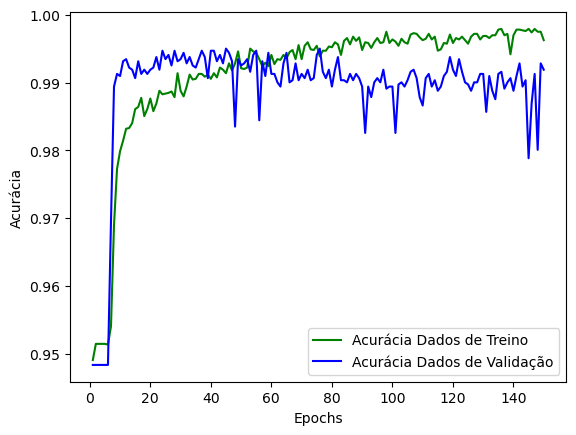

101/101 [==============================] - 1s 4ms/step


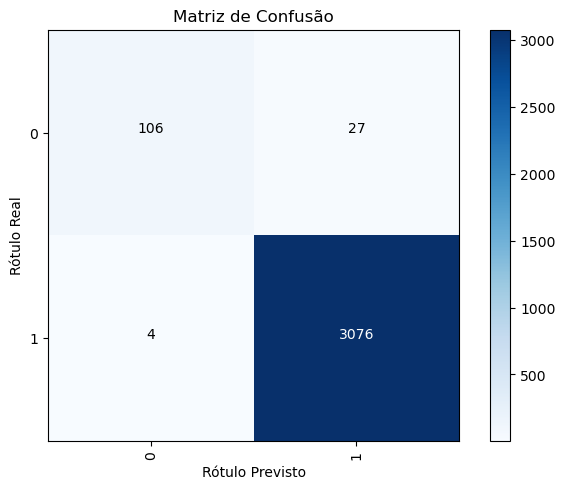

              precision    recall  f1-score   support

           0       0.96      0.80      0.87       133
           1       0.99      1.00      0.99      3080

    accuracy                           0.99      3213
   macro avg       0.98      0.90      0.93      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.8716856799807986


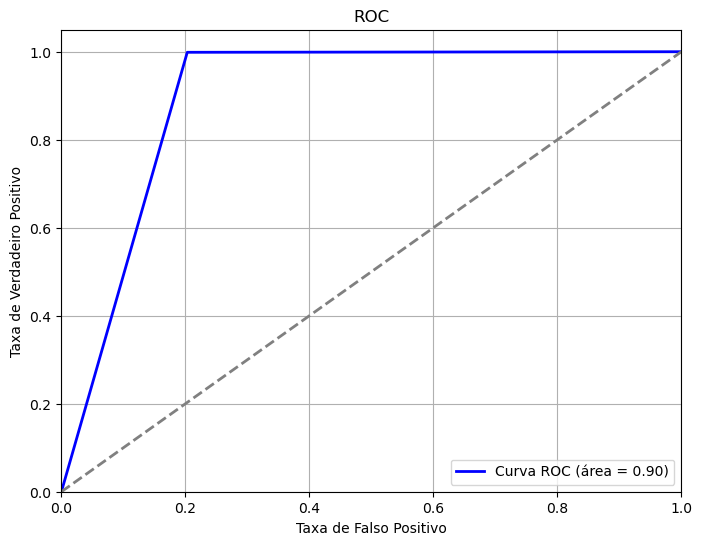

In [4]:
rede_MLP(X,y,2)

Epoch 1/150
302/302 [==============================] - 4s 10ms/step - loss: 0.2880 - acc: 0.9514 - val_loss: 0.2291 - val_acc: 0.9518
Epoch 2/150
302/302 [==============================] - 3s 9ms/step - loss: 0.2110 - acc: 0.9528 - val_loss: 0.1719 - val_acc: 0.9518
Epoch 3/150
302/302 [==============================] - 3s 8ms/step - loss: 0.1719 - acc: 0.9528 - val_loss: 0.1397 - val_acc: 0.9518
Epoch 4/150
302/302 [==============================] - 2s 8ms/step - loss: 0.1475 - acc: 0.9528 - val_loss: 0.1081 - val_acc: 0.9518
Epoch 5/150
302/302 [==============================] - 3s 9ms/step - loss: 0.1107 - acc: 0.9611 - val_loss: 0.0751 - val_acc: 0.9801
Epoch 6/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0831 - acc: 0.9723 - val_loss: 0.0562 - val_acc: 0.9900
Epoch 7/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0684 - acc: 0.9774 - val_loss: 0.0466 - val_acc: 0.9907
Epoch 8/150
302/302 [==============================] - 2s 8ms/step -

302/302 [==============================] - 3s 8ms/step - loss: 0.0178 - acc: 0.9937 - val_loss: 0.0180 - val_acc: 0.9947
Epoch 63/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0206 - acc: 0.9916 - val_loss: 0.0348 - val_acc: 0.9891
Epoch 64/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0169 - acc: 0.9926 - val_loss: 0.0194 - val_acc: 0.9944
Epoch 65/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0159 - acc: 0.9934 - val_loss: 0.0173 - val_acc: 0.9941
Epoch 66/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0166 - acc: 0.9940 - val_loss: 0.0217 - val_acc: 0.9935
Epoch 67/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0207 - acc: 0.9921 - val_loss: 0.0185 - val_acc: 0.9919
Epoch 68/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0201 - acc: 0.9924 - val_loss: 0.0300 - val_acc: 0.9925
Epoch 69/150
302/302 [==============================] - 2s 7ms/step - loss:

302/302 [==============================] - 2s 8ms/step - loss: 0.0083 - acc: 0.9968 - val_loss: 0.0672 - val_acc: 0.9872
Epoch 124/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0096 - acc: 0.9961 - val_loss: 0.0237 - val_acc: 0.9925
Epoch 125/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0091 - acc: 0.9969 - val_loss: 0.0398 - val_acc: 0.9910
Epoch 126/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0108 - acc: 0.9966 - val_loss: 0.0471 - val_acc: 0.9913
Epoch 127/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0096 - acc: 0.9969 - val_loss: 0.0424 - val_acc: 0.9894
Epoch 128/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0108 - acc: 0.9961 - val_loss: 0.0402 - val_acc: 0.9900
Epoch 129/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0061 - acc: 0.9976 - val_loss: 0.0296 - val_acc: 0.9932
Epoch 130/150
302/302 [==============================] - 2s 8ms/step 

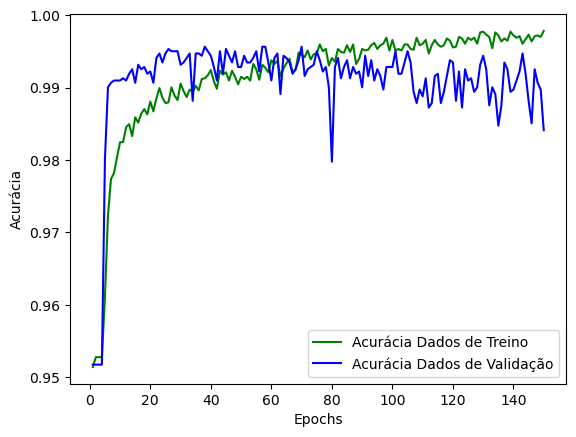

101/101 [==============================] - 0s 3ms/step


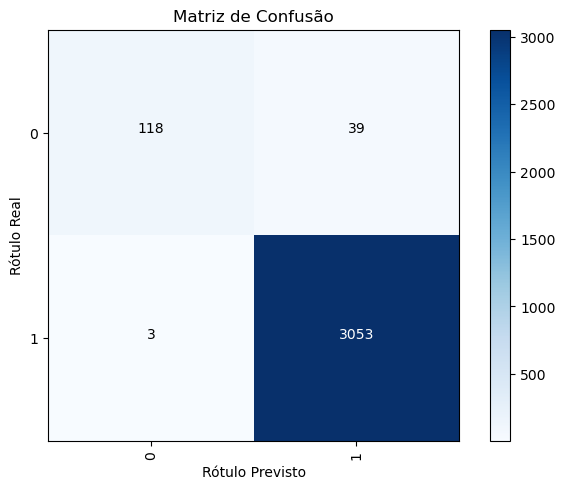

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       157
           1       0.99      1.00      0.99      3056

    accuracy                           0.99      3213
   macro avg       0.98      0.88      0.92      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.8500193527001433


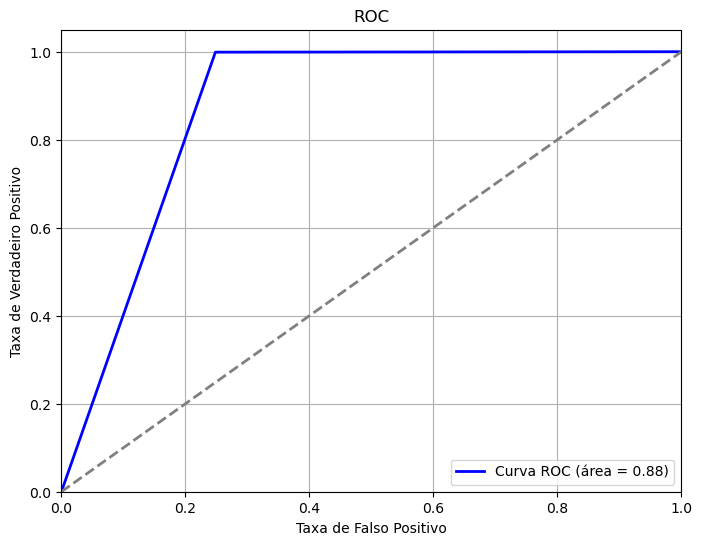

In [5]:
rede_MLP(X,y,3)

Epoch 1/150
302/302 [==============================] - 4s 9ms/step - loss: 0.2823 - acc: 0.9498 - val_loss: 0.2357 - val_acc: 0.9480
Epoch 2/150
302/302 [==============================] - 2s 7ms/step - loss: 0.2050 - acc: 0.9522 - val_loss: 0.1762 - val_acc: 0.9480
Epoch 3/150
302/302 [==============================] - 3s 8ms/step - loss: 0.1696 - acc: 0.9522 - val_loss: 0.1422 - val_acc: 0.9480
Epoch 4/150
302/302 [==============================] - 3s 9ms/step - loss: 0.1408 - acc: 0.9529 - val_loss: 0.0994 - val_acc: 0.9527
Epoch 5/150
302/302 [==============================] - 2s 7ms/step - loss: 0.1021 - acc: 0.9654 - val_loss: 0.0649 - val_acc: 0.9916
Epoch 6/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0783 - acc: 0.9766 - val_loss: 0.0460 - val_acc: 0.9916
Epoch 7/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0692 - acc: 0.9785 - val_loss: 0.0451 - val_acc: 0.9907
Epoch 8/150
302/302 [==============================] - 3s 8ms/step - 

302/302 [==============================] - 3s 8ms/step - loss: 0.0155 - acc: 0.9937 - val_loss: 0.0164 - val_acc: 0.9950
Epoch 63/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0174 - acc: 0.9940 - val_loss: 0.0144 - val_acc: 0.9960
Epoch 64/150
302/302 [==============================] - 2s 6ms/step - loss: 0.0148 - acc: 0.9942 - val_loss: 0.0207 - val_acc: 0.9941
Epoch 65/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0152 - acc: 0.9943 - val_loss: 0.0144 - val_acc: 0.9956
Epoch 66/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0167 - acc: 0.9936 - val_loss: 0.0165 - val_acc: 0.9944
Epoch 67/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0152 - acc: 0.9943 - val_loss: 0.0156 - val_acc: 0.9960
Epoch 68/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0162 - acc: 0.9938 - val_loss: 0.0307 - val_acc: 0.9897
Epoch 69/150
302/302 [==============================] - 2s 8ms/step - loss:

302/302 [==============================] - 3s 9ms/step - loss: 0.0084 - acc: 0.9970 - val_loss: 0.0191 - val_acc: 0.9947
Epoch 124/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0079 - acc: 0.9975 - val_loss: 0.0266 - val_acc: 0.9916
Epoch 125/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0066 - acc: 0.9976 - val_loss: 0.0199 - val_acc: 0.9944
Epoch 126/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0073 - acc: 0.9968 - val_loss: 0.0226 - val_acc: 0.9935
Epoch 127/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0079 - acc: 0.9975 - val_loss: 0.0142 - val_acc: 0.9963
Epoch 128/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0082 - acc: 0.9967 - val_loss: 0.0402 - val_acc: 0.9891
Epoch 129/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0087 - acc: 0.9970 - val_loss: 0.0405 - val_acc: 0.9891
Epoch 130/150
302/302 [==============================] - 2s 8ms/step 

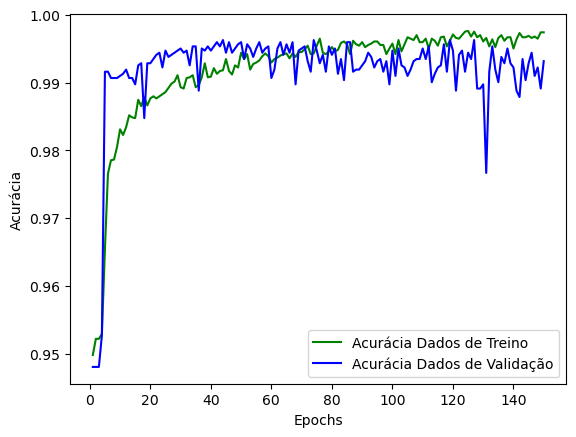

101/101 [==============================] - 0s 3ms/step


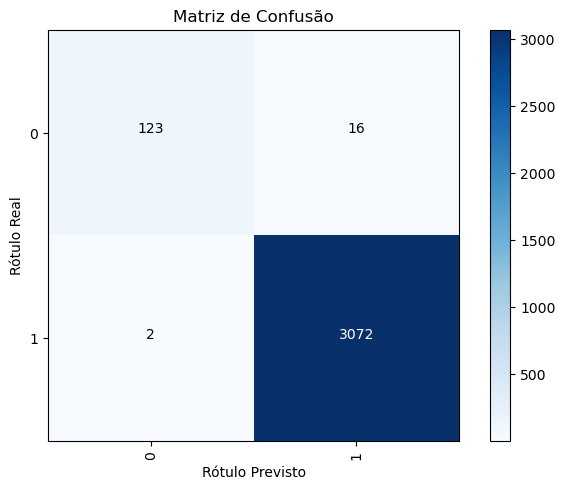

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       139
           1       0.99      1.00      1.00      3074

    accuracy                           0.99      3213
   macro avg       0.99      0.94      0.96      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.9303289970436409


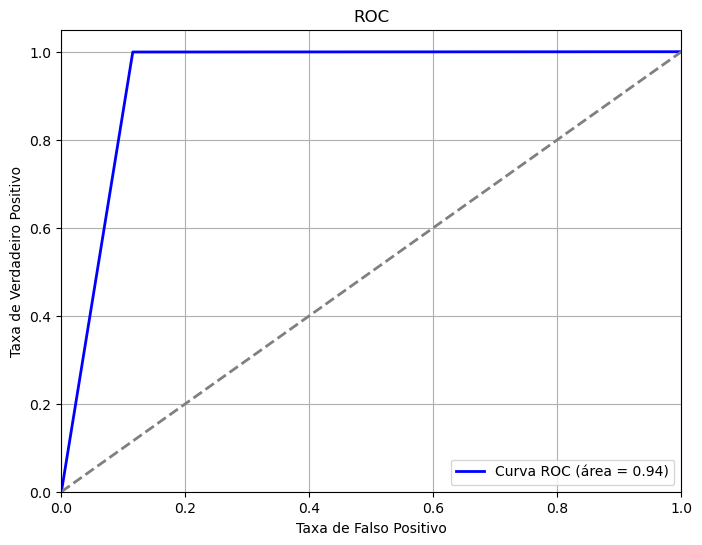

In [6]:
rede_MLP(X,y,4)

Epoch 1/150
302/302 [==============================] - 4s 9ms/step - loss: 0.2835 - acc: 0.9503 - val_loss: 0.2331 - val_acc: 0.9524
Epoch 2/150
302/302 [==============================] - 2s 8ms/step - loss: 0.2070 - acc: 0.9532 - val_loss: 0.1721 - val_acc: 0.9524
Epoch 3/150
302/302 [==============================] - 3s 9ms/step - loss: 0.1700 - acc: 0.9532 - val_loss: 0.1379 - val_acc: 0.9524
Epoch 4/150
302/302 [==============================] - 2s 7ms/step - loss: 0.1391 - acc: 0.9535 - val_loss: 0.1051 - val_acc: 0.9524
Epoch 5/150
302/302 [==============================] - 3s 9ms/step - loss: 0.1050 - acc: 0.9636 - val_loss: 0.0794 - val_acc: 0.9851
Epoch 6/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0826 - acc: 0.9726 - val_loss: 0.0608 - val_acc: 0.9872
Epoch 7/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0736 - acc: 0.9760 - val_loss: 0.0520 - val_acc: 0.9872
Epoch 8/150
302/302 [==============================] - 2s 8ms/step - 

302/302 [==============================] - 3s 9ms/step - loss: 0.0191 - acc: 0.9929 - val_loss: 0.0217 - val_acc: 0.9916
Epoch 63/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0143 - acc: 0.9950 - val_loss: 0.0248 - val_acc: 0.9916
Epoch 64/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0167 - acc: 0.9929 - val_loss: 0.0264 - val_acc: 0.9922
Epoch 65/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0172 - acc: 0.9943 - val_loss: 0.0223 - val_acc: 0.9900
Epoch 66/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0145 - acc: 0.9946 - val_loss: 0.0310 - val_acc: 0.9907
Epoch 67/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0164 - acc: 0.9942 - val_loss: 0.0217 - val_acc: 0.9925
Epoch 68/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0162 - acc: 0.9942 - val_loss: 0.0316 - val_acc: 0.9910
Epoch 69/150
302/302 [==============================] - 2s 7ms/step - loss:

302/302 [==============================] - 2s 7ms/step - loss: 0.0130 - acc: 0.9951 - val_loss: 0.0463 - val_acc: 0.9894
Epoch 124/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0119 - acc: 0.9958 - val_loss: 0.0287 - val_acc: 0.9922
Epoch 125/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0083 - acc: 0.9972 - val_loss: 0.0346 - val_acc: 0.9919
Epoch 126/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0094 - acc: 0.9963 - val_loss: 0.0311 - val_acc: 0.9916
Epoch 127/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0107 - acc: 0.9964 - val_loss: 0.0354 - val_acc: 0.9916
Epoch 128/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0084 - acc: 0.9971 - val_loss: 0.0521 - val_acc: 0.9894
Epoch 129/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0070 - acc: 0.9974 - val_loss: 0.0431 - val_acc: 0.9916
Epoch 130/150
302/302 [==============================] - 3s 8ms/step 

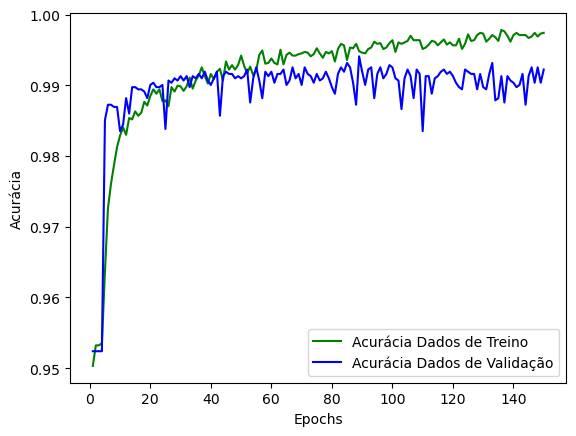

101/101 [==============================] - 0s 3ms/step


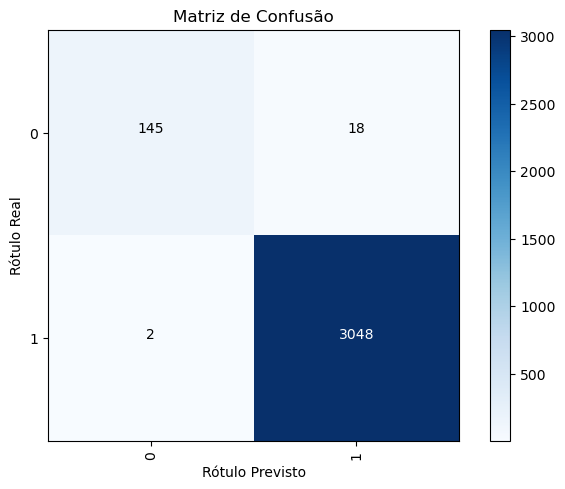

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       163
           1       0.99      1.00      1.00      3050

    accuracy                           0.99      3213
   macro avg       0.99      0.94      0.97      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.9335963032076426


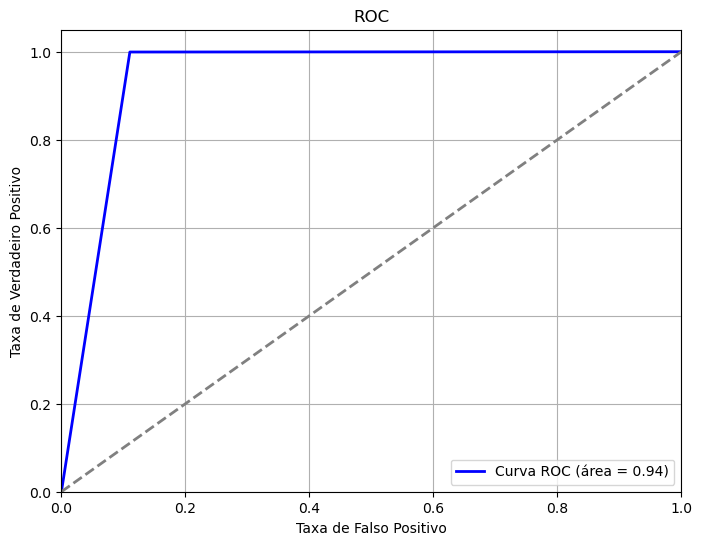

In [7]:
rede_MLP(X,y,5)

Epoch 1/150
302/302 [==============================] - 4s 9ms/step - loss: 0.2857 - acc: 0.9510 - val_loss: 0.2303 - val_acc: 0.9483
Epoch 2/150
302/302 [==============================] - 2s 7ms/step - loss: 0.2064 - acc: 0.9532 - val_loss: 0.1828 - val_acc: 0.9483
Epoch 3/150
302/302 [==============================] - 2s 8ms/step - loss: 0.1725 - acc: 0.9532 - val_loss: 0.1455 - val_acc: 0.9483
Epoch 4/150
302/302 [==============================] - 3s 8ms/step - loss: 0.1423 - acc: 0.9537 - val_loss: 0.1037 - val_acc: 0.9530
Epoch 5/150
302/302 [==============================] - 3s 9ms/step - loss: 0.1062 - acc: 0.9637 - val_loss: 0.0781 - val_acc: 0.9857
Epoch 6/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0835 - acc: 0.9724 - val_loss: 0.0599 - val_acc: 0.9882
Epoch 7/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0680 - acc: 0.9785 - val_loss: 0.0536 - val_acc: 0.9860
Epoch 8/150
302/302 [==============================] - 2s 8ms/step - 

302/302 [==============================] - 3s 9ms/step - loss: 0.0186 - acc: 0.9939 - val_loss: 0.0367 - val_acc: 0.9897
Epoch 63/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0155 - acc: 0.9941 - val_loss: 0.0256 - val_acc: 0.9941
Epoch 64/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0186 - acc: 0.9941 - val_loss: 0.0289 - val_acc: 0.9916
Epoch 65/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0194 - acc: 0.9926 - val_loss: 0.0278 - val_acc: 0.9928
Epoch 66/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0178 - acc: 0.9935 - val_loss: 0.0261 - val_acc: 0.9919
Epoch 67/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0172 - acc: 0.9937 - val_loss: 0.0252 - val_acc: 0.9928
Epoch 68/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0142 - acc: 0.9954 - val_loss: 0.0296 - val_acc: 0.9925
Epoch 69/150
302/302 [==============================] - 2s 7ms/step - loss:

302/302 [==============================] - 2s 8ms/step - loss: 0.0089 - acc: 0.9969 - val_loss: 0.0377 - val_acc: 0.9916
Epoch 124/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0107 - acc: 0.9964 - val_loss: 0.0290 - val_acc: 0.9919
Epoch 125/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0090 - acc: 0.9969 - val_loss: 0.0430 - val_acc: 0.9891
Epoch 126/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0094 - acc: 0.9965 - val_loss: 0.0578 - val_acc: 0.9879
Epoch 127/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0078 - acc: 0.9974 - val_loss: 0.0403 - val_acc: 0.9888
Epoch 128/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0076 - acc: 0.9974 - val_loss: 0.0356 - val_acc: 0.9913
Epoch 129/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0073 - acc: 0.9970 - val_loss: 0.0287 - val_acc: 0.9935
Epoch 130/150
302/302 [==============================] - 2s 7ms/step 

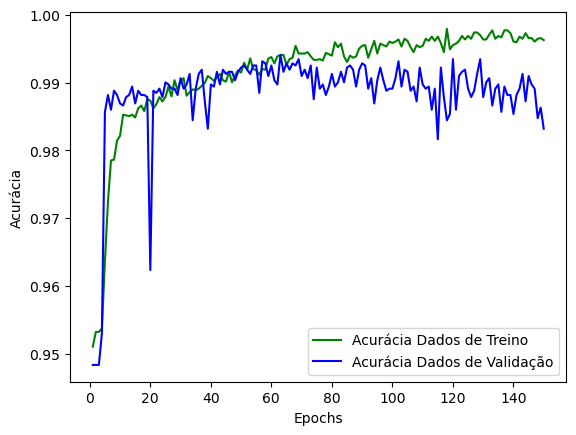

101/101 [==============================] - 0s 3ms/step


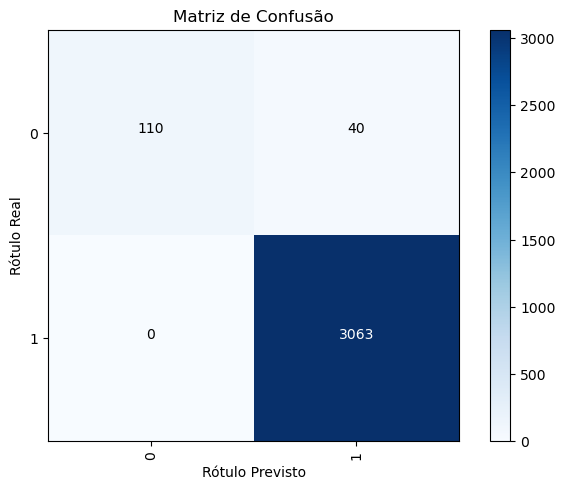

              precision    recall  f1-score   support

           0       1.00      0.73      0.85       150
           1       0.99      1.00      0.99      3063

    accuracy                           0.99      3213
   macro avg       0.99      0.87      0.92      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.850811445631027


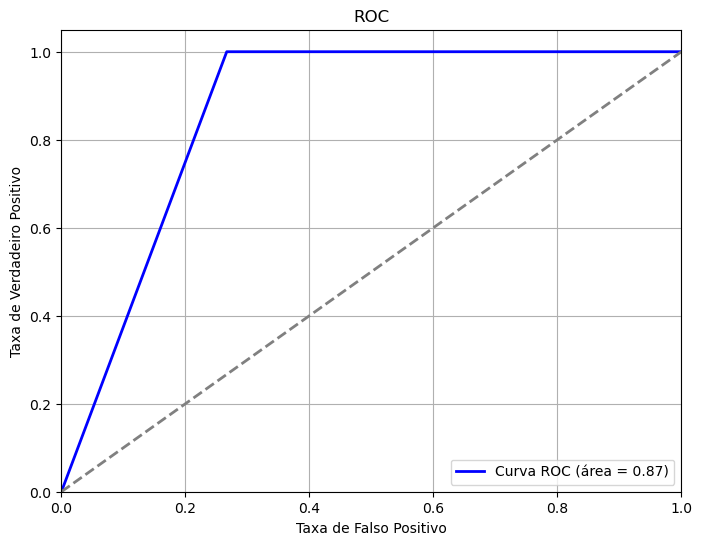

In [8]:
rede_MLP(X,y,6)

Epoch 1/150
302/302 [==============================] - 4s 9ms/step - loss: 0.2776 - acc: 0.9545 - val_loss: 0.2384 - val_acc: 0.9486
Epoch 2/150
302/302 [==============================] - 3s 8ms/step - loss: 0.1980 - acc: 0.9563 - val_loss: 0.1793 - val_acc: 0.9486
Epoch 3/150
302/302 [==============================] - 2s 7ms/step - loss: 0.1655 - acc: 0.9563 - val_loss: 0.1475 - val_acc: 0.9486
Epoch 4/150
302/302 [==============================] - 2s 8ms/step - loss: 0.1420 - acc: 0.9562 - val_loss: 0.1191 - val_acc: 0.9486
Epoch 5/150
302/302 [==============================] - 2s 7ms/step - loss: 0.1136 - acc: 0.9595 - val_loss: 0.0794 - val_acc: 0.9714
Epoch 6/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0840 - acc: 0.9708 - val_loss: 0.0603 - val_acc: 0.9879
Epoch 7/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0671 - acc: 0.9779 - val_loss: 0.0476 - val_acc: 0.9910
Epoch 8/150
302/302 [==============================] - 2s 7ms/step - 

302/302 [==============================] - 2s 8ms/step - loss: 0.0186 - acc: 0.9934 - val_loss: 0.0365 - val_acc: 0.9900
Epoch 63/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0139 - acc: 0.9950 - val_loss: 0.0224 - val_acc: 0.9944
Epoch 64/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0159 - acc: 0.9939 - val_loss: 0.0370 - val_acc: 0.9894
Epoch 65/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0145 - acc: 0.9949 - val_loss: 0.0794 - val_acc: 0.9791
Epoch 66/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0142 - acc: 0.9949 - val_loss: 0.0246 - val_acc: 0.9928
Epoch 67/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0152 - acc: 0.9940 - val_loss: 0.0308 - val_acc: 0.9925
Epoch 68/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0143 - acc: 0.9947 - val_loss: 0.0398 - val_acc: 0.9900
Epoch 69/150
302/302 [==============================] - 2s 8ms/step - loss:

302/302 [==============================] - 2s 8ms/step - loss: 0.0077 - acc: 0.9971 - val_loss: 0.0329 - val_acc: 0.9922
Epoch 124/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0088 - acc: 0.9966 - val_loss: 0.0457 - val_acc: 0.9854
Epoch 125/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0088 - acc: 0.9971 - val_loss: 0.0555 - val_acc: 0.9844
Epoch 126/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0080 - acc: 0.9976 - val_loss: 0.0591 - val_acc: 0.9866
Epoch 127/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0105 - acc: 0.9961 - val_loss: 0.0622 - val_acc: 0.9844
Epoch 128/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0087 - acc: 0.9964 - val_loss: 0.0457 - val_acc: 0.9888
Epoch 129/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0063 - acc: 0.9978 - val_loss: 0.0369 - val_acc: 0.9885
Epoch 130/150
302/302 [==============================] - 2s 8ms/step 

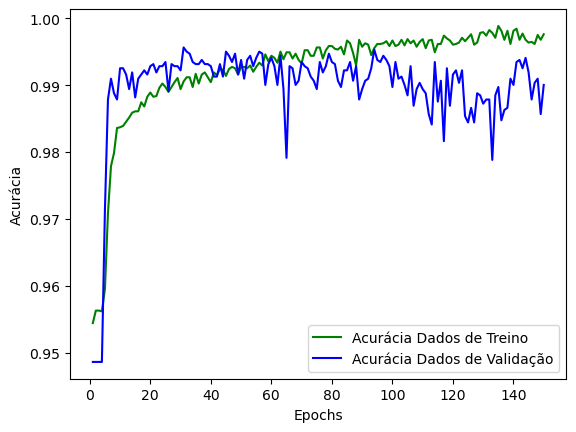

101/101 [==============================] - 0s 3ms/step


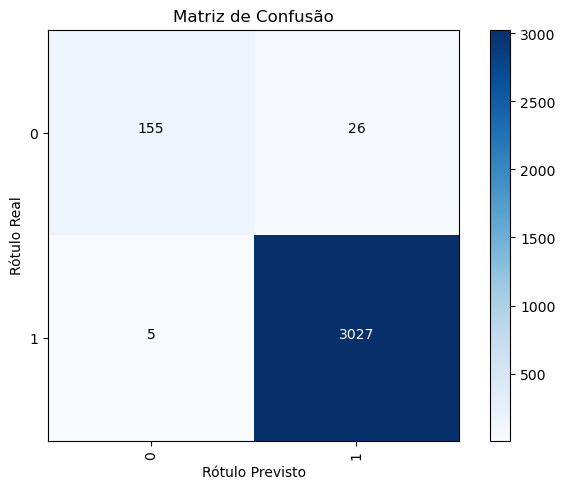

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       181
           1       0.99      1.00      0.99      3032

    accuracy                           0.99      3213
   macro avg       0.98      0.93      0.95      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.9059338565164173


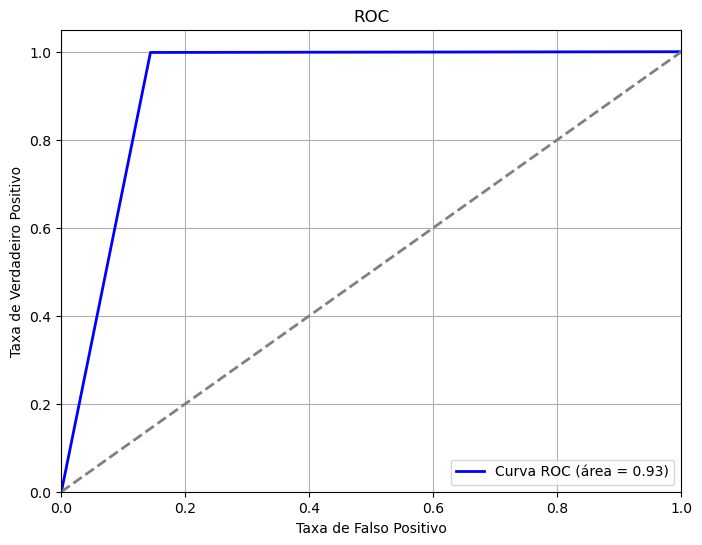

In [9]:
rede_MLP(X,y,7)

Epoch 1/150
302/302 [==============================] - 4s 8ms/step - loss: 0.2939 - acc: 0.9502 - val_loss: 0.2330 - val_acc: 0.9561
Epoch 2/150
302/302 [==============================] - 2s 7ms/step - loss: 0.2193 - acc: 0.9523 - val_loss: 0.1811 - val_acc: 0.9561
Epoch 3/150
302/302 [==============================] - 2s 7ms/step - loss: 0.1893 - acc: 0.9523 - val_loss: 0.1548 - val_acc: 0.9561
Epoch 4/150
302/302 [==============================] - 2s 8ms/step - loss: 0.1676 - acc: 0.9523 - val_loss: 0.1324 - val_acc: 0.9561
Epoch 5/150
302/302 [==============================] - 2s 7ms/step - loss: 0.1462 - acc: 0.9522 - val_loss: 0.1009 - val_acc: 0.9561
Epoch 6/150
302/302 [==============================] - 2s 7ms/step - loss: 0.1138 - acc: 0.9597 - val_loss: 0.0704 - val_acc: 0.9876
Epoch 7/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0840 - acc: 0.9733 - val_loss: 0.0531 - val_acc: 0.9897
Epoch 8/150
302/302 [==============================] - 2s 7ms/step - 

302/302 [==============================] - 2s 7ms/step - loss: 0.0165 - acc: 0.9932 - val_loss: 0.0172 - val_acc: 0.9947
Epoch 63/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0169 - acc: 0.9939 - val_loss: 0.0170 - val_acc: 0.9950
Epoch 64/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0155 - acc: 0.9942 - val_loss: 0.0174 - val_acc: 0.9953
Epoch 65/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0150 - acc: 0.9940 - val_loss: 0.0233 - val_acc: 0.9938
Epoch 66/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0158 - acc: 0.9937 - val_loss: 0.0194 - val_acc: 0.9941
Epoch 67/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0171 - acc: 0.9940 - val_loss: 0.0166 - val_acc: 0.9956
Epoch 68/150
302/302 [==============================] - 2s 6ms/step - loss: 0.0144 - acc: 0.9950 - val_loss: 0.0132 - val_acc: 0.9953
Epoch 69/150
302/302 [==============================] - 2s 8ms/step - loss:

302/302 [==============================] - 3s 8ms/step - loss: 0.0078 - acc: 0.9967 - val_loss: 0.0191 - val_acc: 0.9960
Epoch 124/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0068 - acc: 0.9980 - val_loss: 0.0206 - val_acc: 0.9956
Epoch 125/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0074 - acc: 0.9973 - val_loss: 0.0296 - val_acc: 0.9938
Epoch 126/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0114 - acc: 0.9961 - val_loss: 0.0236 - val_acc: 0.9950
Epoch 127/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0064 - acc: 0.9974 - val_loss: 0.0258 - val_acc: 0.9944
Epoch 128/150
302/302 [==============================] - 2s 6ms/step - loss: 0.0064 - acc: 0.9982 - val_loss: 0.0313 - val_acc: 0.9935
Epoch 129/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0096 - acc: 0.9964 - val_loss: 0.0231 - val_acc: 0.9953
Epoch 130/150
302/302 [==============================] - 2s 8ms/step 

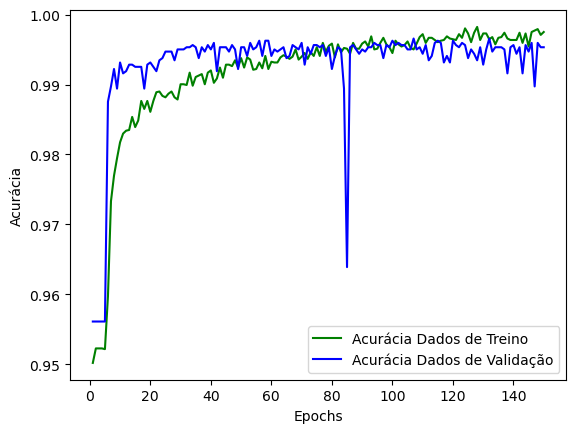

101/101 [==============================] - 0s 3ms/step


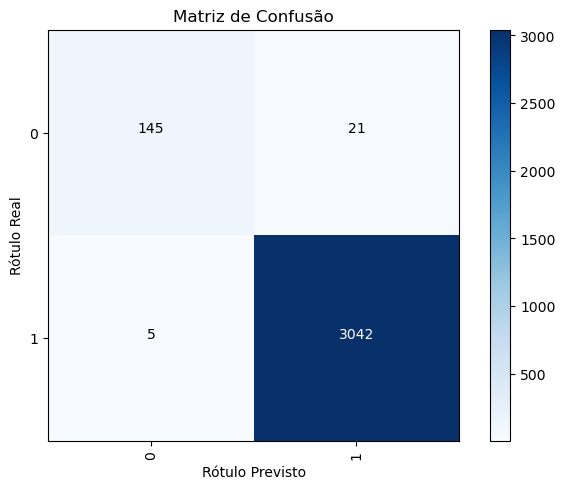

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       166
           1       0.99      1.00      1.00      3047

    accuracy                           0.99      3213
   macro avg       0.98      0.94      0.96      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.9147752759823067


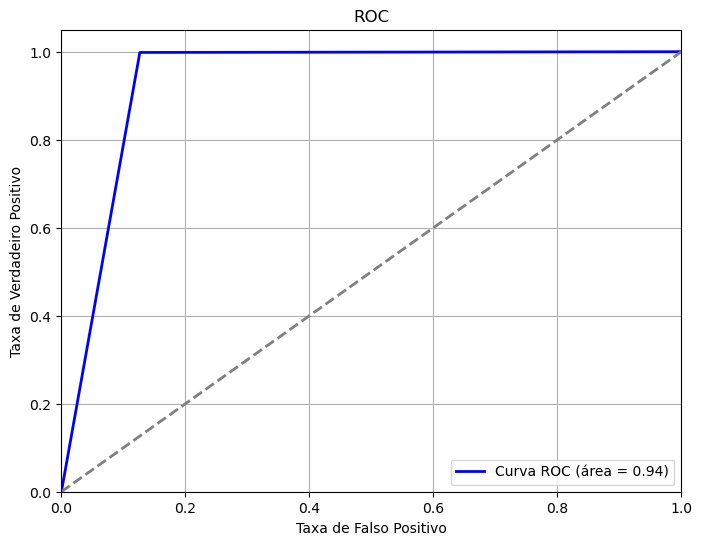

In [10]:
rede_MLP(X,y,8)

Epoch 1/150
302/302 [==============================] - 4s 10ms/step - loss: 0.2838 - acc: 0.9524 - val_loss: 0.2333 - val_acc: 0.9496
Epoch 2/150
302/302 [==============================] - 2s 8ms/step - loss: 0.2045 - acc: 0.9534 - val_loss: 0.1762 - val_acc: 0.9496
Epoch 3/150
302/302 [==============================] - 2s 7ms/step - loss: 0.1706 - acc: 0.9534 - val_loss: 0.1459 - val_acc: 0.9496
Epoch 4/150
302/302 [==============================] - 2s 8ms/step - loss: 0.1446 - acc: 0.9533 - val_loss: 0.1130 - val_acc: 0.9496
Epoch 5/150
302/302 [==============================] - 2s 8ms/step - loss: 0.1129 - acc: 0.9591 - val_loss: 0.0771 - val_acc: 0.9829
Epoch 6/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0809 - acc: 0.9734 - val_loss: 0.0602 - val_acc: 0.9872
Epoch 7/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0678 - acc: 0.9799 - val_loss: 0.0501 - val_acc: 0.9872
Epoch 8/150
302/302 [==============================] - 2s 7ms/step -

302/302 [==============================] - 2s 7ms/step - loss: 0.0166 - acc: 0.9939 - val_loss: 0.0330 - val_acc: 0.9900
Epoch 63/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0117 - acc: 0.9963 - val_loss: 0.0318 - val_acc: 0.9913
Epoch 64/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0167 - acc: 0.9940 - val_loss: 0.0320 - val_acc: 0.9913
Epoch 65/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0113 - acc: 0.9960 - val_loss: 0.0345 - val_acc: 0.9916
Epoch 66/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0112 - acc: 0.9963 - val_loss: 0.0283 - val_acc: 0.9928
Epoch 67/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0141 - acc: 0.9947 - val_loss: 0.0323 - val_acc: 0.9919
Epoch 68/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0144 - acc: 0.9939 - val_loss: 0.0441 - val_acc: 0.9897
Epoch 69/150
302/302 [==============================] - 2s 7ms/step - loss:

302/302 [==============================] - 2s 7ms/step - loss: 0.0094 - acc: 0.9971 - val_loss: 0.0480 - val_acc: 0.9913
Epoch 124/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0089 - acc: 0.9967 - val_loss: 0.0486 - val_acc: 0.9910
Epoch 125/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0105 - acc: 0.9968 - val_loss: 0.0377 - val_acc: 0.9913
Epoch 126/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0108 - acc: 0.9956 - val_loss: 0.0427 - val_acc: 0.9897
Epoch 127/150
302/302 [==============================] - 2s 6ms/step - loss: 0.0095 - acc: 0.9964 - val_loss: 0.0595 - val_acc: 0.9888
Epoch 128/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0074 - acc: 0.9973 - val_loss: 0.0681 - val_acc: 0.9879
Epoch 129/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0108 - acc: 0.9960 - val_loss: 0.0452 - val_acc: 0.9888
Epoch 130/150
302/302 [==============================] - 2s 8ms/step 

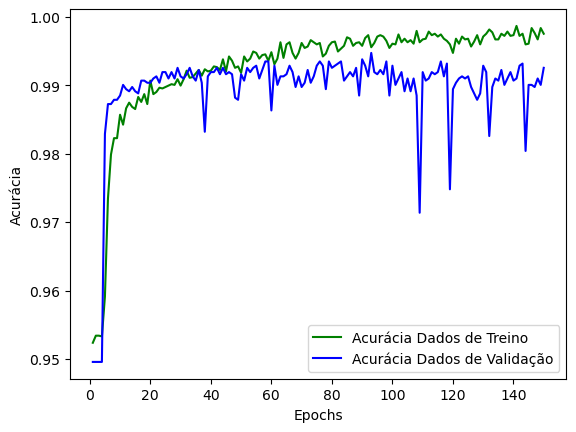

101/101 [==============================] - 0s 3ms/step


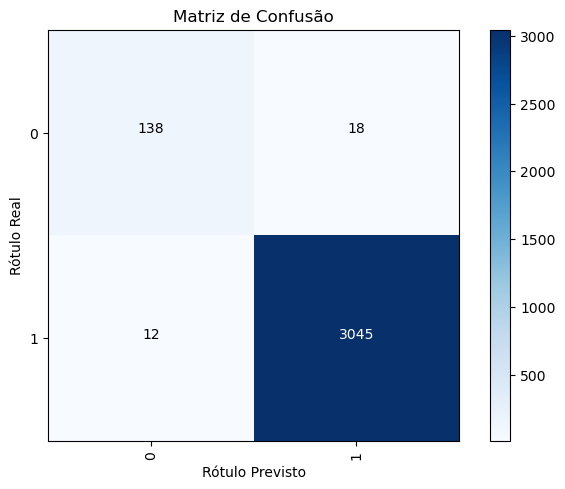

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       156
           1       0.99      1.00      1.00      3057

    accuracy                           0.99      3213
   macro avg       0.96      0.94      0.95      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.8972509765341817


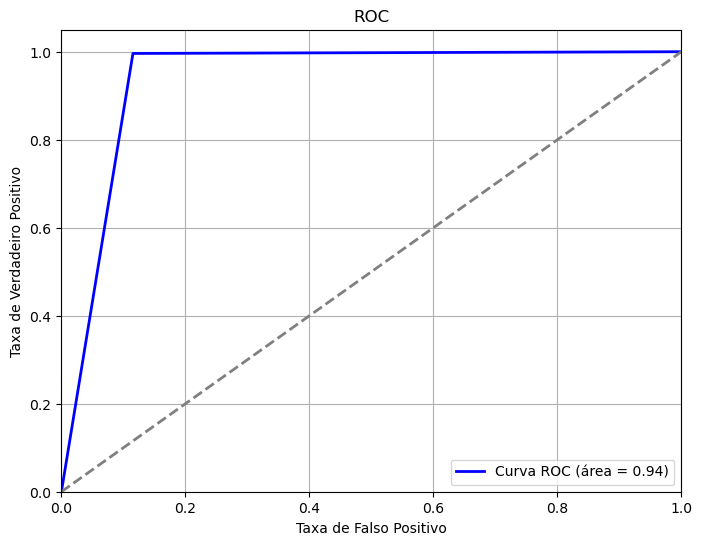

In [11]:
rede_MLP(X,y,9)

Epoch 1/150
302/302 [==============================] - 4s 9ms/step - loss: 0.2804 - acc: 0.9513 - val_loss: 0.2224 - val_acc: 0.9505
Epoch 2/150
302/302 [==============================] - 2s 8ms/step - loss: 0.2029 - acc: 0.9532 - val_loss: 0.1726 - val_acc: 0.9505
Epoch 3/150
302/302 [==============================] - 2s 7ms/step - loss: 0.1698 - acc: 0.9532 - val_loss: 0.1430 - val_acc: 0.9505
Epoch 4/150
302/302 [==============================] - 2s 7ms/step - loss: 0.1461 - acc: 0.9533 - val_loss: 0.1143 - val_acc: 0.9505
Epoch 5/150
302/302 [==============================] - 2s 8ms/step - loss: 0.1144 - acc: 0.9574 - val_loss: 0.0788 - val_acc: 0.9704
Epoch 6/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0842 - acc: 0.9737 - val_loss: 0.0581 - val_acc: 0.9894
Epoch 7/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0683 - acc: 0.9780 - val_loss: 0.0480 - val_acc: 0.9904
Epoch 8/150
302/302 [==============================] - 2s 8ms/step - 

302/302 [==============================] - 2s 7ms/step - loss: 0.0144 - acc: 0.9941 - val_loss: 0.0240 - val_acc: 0.9932
Epoch 63/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0166 - acc: 0.9929 - val_loss: 0.0263 - val_acc: 0.9932
Epoch 64/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0137 - acc: 0.9951 - val_loss: 0.0283 - val_acc: 0.9916
Epoch 65/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0195 - acc: 0.9920 - val_loss: 0.0339 - val_acc: 0.9904
Epoch 66/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0178 - acc: 0.9927 - val_loss: 0.0649 - val_acc: 0.9832
Epoch 67/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0160 - acc: 0.9935 - val_loss: 0.0230 - val_acc: 0.9938
Epoch 68/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0153 - acc: 0.9940 - val_loss: 0.0222 - val_acc: 0.9932
Epoch 69/150
302/302 [==============================] - 2s 7ms/step - loss:

302/302 [==============================] - 2s 7ms/step - loss: 0.0084 - acc: 0.9970 - val_loss: 0.0454 - val_acc: 0.9894
Epoch 124/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0082 - acc: 0.9974 - val_loss: 0.0419 - val_acc: 0.9910
Epoch 125/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0107 - acc: 0.9962 - val_loss: 0.0455 - val_acc: 0.9900
Epoch 126/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0083 - acc: 0.9965 - val_loss: 0.0534 - val_acc: 0.9900
Epoch 127/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0096 - acc: 0.9964 - val_loss: 0.0506 - val_acc: 0.9894
Epoch 128/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0101 - acc: 0.9962 - val_loss: 0.0430 - val_acc: 0.9897
Epoch 129/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0101 - acc: 0.9961 - val_loss: 0.0385 - val_acc: 0.9925
Epoch 130/150
302/302 [==============================] - 2s 8ms/step 

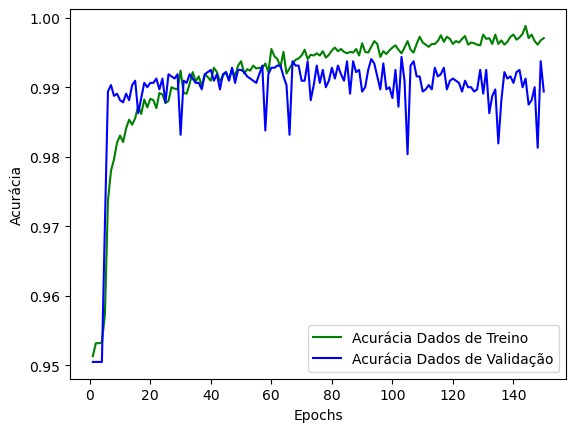

101/101 [==============================] - 0s 3ms/step


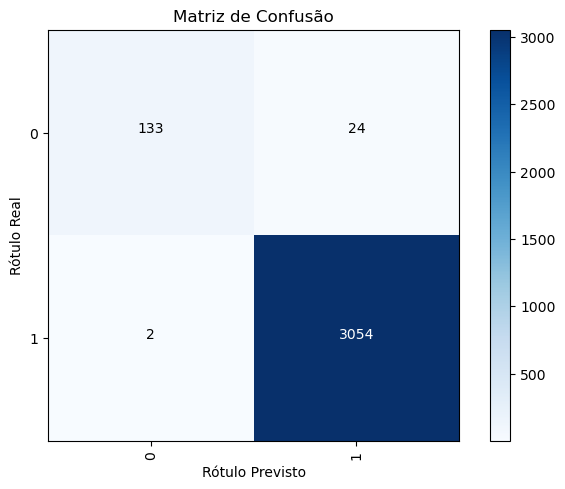

              precision    recall  f1-score   support

           0       0.99      0.85      0.91       157
           1       0.99      1.00      1.00      3056

    accuracy                           0.99      3213
   macro avg       0.99      0.92      0.95      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.9095815768757506


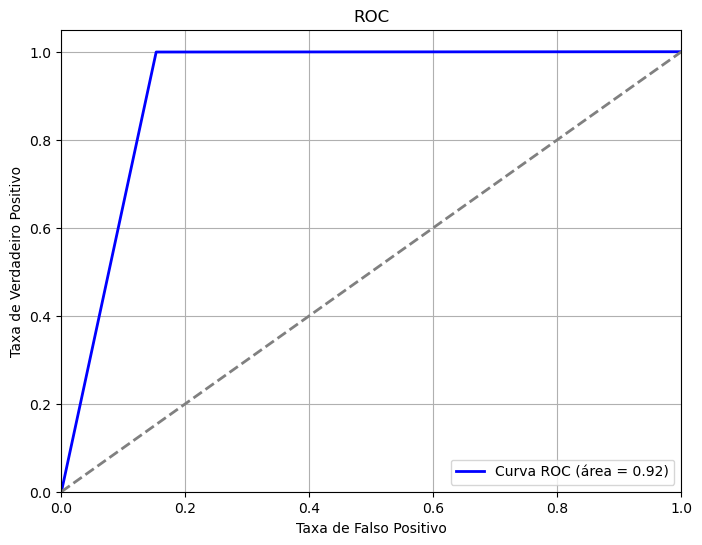

In [12]:
rede_MLP(X,y,10)

Epoch 1/150
302/302 [==============================] - 4s 9ms/step - loss: 0.2983 - acc: 0.9472 - val_loss: 0.2237 - val_acc: 0.9552
Epoch 2/150
302/302 [==============================] - 2s 8ms/step - loss: 0.2141 - acc: 0.9505 - val_loss: 0.1681 - val_acc: 0.9552
Epoch 3/150
302/302 [==============================] - 3s 8ms/step - loss: 0.1801 - acc: 0.9504 - val_loss: 0.1418 - val_acc: 0.9552
Epoch 4/150
302/302 [==============================] - 2s 8ms/step - loss: 0.1525 - acc: 0.9507 - val_loss: 0.1110 - val_acc: 0.9552
Epoch 5/150
302/302 [==============================] - 1s 5ms/step - loss: 0.1186 - acc: 0.9561 - val_loss: 0.0776 - val_acc: 0.9807
Epoch 6/150
302/302 [==============================] - 1s 3ms/step - loss: 0.0880 - acc: 0.9712 - val_loss: 0.0628 - val_acc: 0.9882
Epoch 7/150
302/302 [==============================] - 1s 3ms/step - loss: 0.0725 - acc: 0.9768 - val_loss: 0.0524 - val_acc: 0.9900
Epoch 8/150
302/302 [==============================] - 1s 3ms/step - 

302/302 [==============================] - 2s 8ms/step - loss: 0.0150 - acc: 0.9943 - val_loss: 0.0250 - val_acc: 0.9919
Epoch 63/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0163 - acc: 0.9934 - val_loss: 0.0233 - val_acc: 0.9928
Epoch 64/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0170 - acc: 0.9936 - val_loss: 0.0211 - val_acc: 0.9938
Epoch 65/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0154 - acc: 0.9944 - val_loss: 0.0220 - val_acc: 0.9944
Epoch 66/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0151 - acc: 0.9941 - val_loss: 0.0202 - val_acc: 0.9938
Epoch 67/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0163 - acc: 0.9933 - val_loss: 0.0249 - val_acc: 0.9919
Epoch 68/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0162 - acc: 0.9937 - val_loss: 0.0267 - val_acc: 0.9910
Epoch 69/150
302/302 [==============================] - 2s 7ms/step - loss:

302/302 [==============================] - 2s 7ms/step - loss: 0.0085 - acc: 0.9968 - val_loss: 0.0379 - val_acc: 0.9913
Epoch 124/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0071 - acc: 0.9978 - val_loss: 0.0505 - val_acc: 0.9891
Epoch 125/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0088 - acc: 0.9967 - val_loss: 0.0317 - val_acc: 0.9913
Epoch 126/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0092 - acc: 0.9964 - val_loss: 0.0508 - val_acc: 0.9866
Epoch 127/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0083 - acc: 0.9971 - val_loss: 0.0536 - val_acc: 0.9879
Epoch 128/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0085 - acc: 0.9970 - val_loss: 0.0454 - val_acc: 0.9894
Epoch 129/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0081 - acc: 0.9971 - val_loss: 0.0459 - val_acc: 0.9888
Epoch 130/150
302/302 [==============================] - 3s 8ms/step 

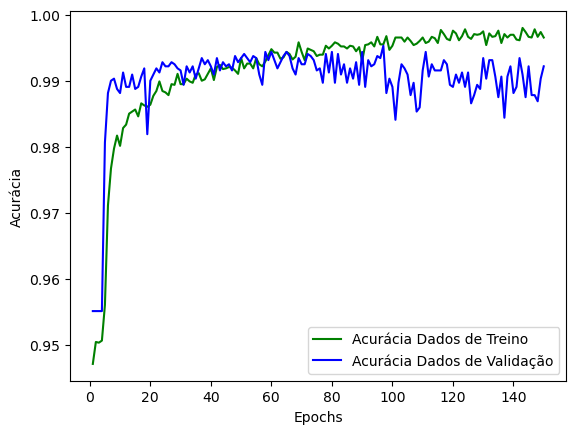

101/101 [==============================] - 1s 4ms/step


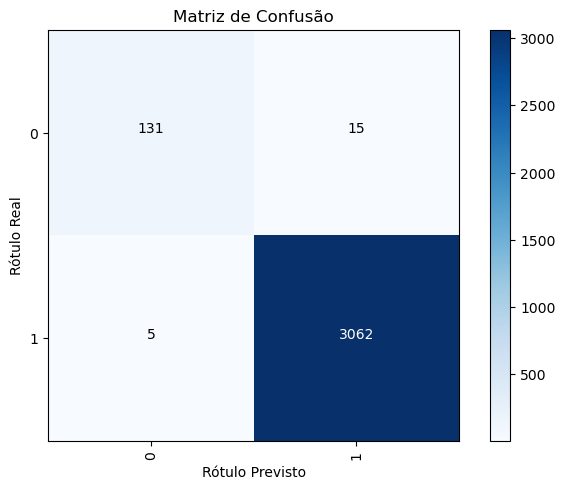

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       146
           1       1.00      1.00      1.00      3067

    accuracy                           0.99      3213
   macro avg       0.98      0.95      0.96      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.9264644381098059


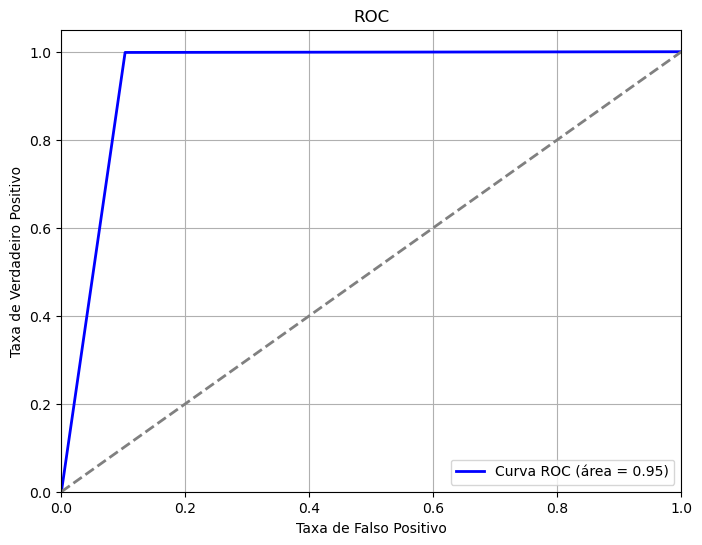

In [13]:
rede_MLP(X,y,11)

Epoch 1/150
302/302 [==============================] - 3s 8ms/step - loss: 0.2871 - acc: 0.9520 - val_loss: 0.2279 - val_acc: 0.9486
Epoch 2/150
302/302 [==============================] - 2s 8ms/step - loss: 0.2082 - acc: 0.9533 - val_loss: 0.1788 - val_acc: 0.9486
Epoch 3/150
302/302 [==============================] - 2s 8ms/step - loss: 0.1710 - acc: 0.9533 - val_loss: 0.1456 - val_acc: 0.9486
Epoch 4/150
302/302 [==============================] - 2s 6ms/step - loss: 0.1429 - acc: 0.9537 - val_loss: 0.1081 - val_acc: 0.9486
Epoch 5/150
302/302 [==============================] - 2s 7ms/step - loss: 0.1092 - acc: 0.9615 - val_loss: 0.0742 - val_acc: 0.9851
Epoch 6/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0821 - acc: 0.9733 - val_loss: 0.0589 - val_acc: 0.9863
Epoch 7/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0655 - acc: 0.9788 - val_loss: 0.0501 - val_acc: 0.9891
Epoch 8/150
302/302 [==============================] - 2s 7ms/step - 

302/302 [==============================] - 2s 8ms/step - loss: 0.0159 - acc: 0.9942 - val_loss: 0.0197 - val_acc: 0.9944
Epoch 63/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0141 - acc: 0.9946 - val_loss: 0.0206 - val_acc: 0.9947
Epoch 64/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0157 - acc: 0.9947 - val_loss: 0.0207 - val_acc: 0.9941
Epoch 65/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0164 - acc: 0.9927 - val_loss: 0.0239 - val_acc: 0.9935
Epoch 66/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0159 - acc: 0.9943 - val_loss: 0.0209 - val_acc: 0.9947
Epoch 67/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0135 - acc: 0.9956 - val_loss: 0.0212 - val_acc: 0.9944
Epoch 68/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0152 - acc: 0.9950 - val_loss: 0.0238 - val_acc: 0.9938
Epoch 69/150
302/302 [==============================] - 2s 7ms/step - loss:

302/302 [==============================] - 2s 7ms/step - loss: 0.0072 - acc: 0.9975 - val_loss: 0.0216 - val_acc: 0.9947
Epoch 124/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0094 - acc: 0.9964 - val_loss: 0.0193 - val_acc: 0.9938
Epoch 125/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0112 - acc: 0.9971 - val_loss: 0.0292 - val_acc: 0.9916
Epoch 126/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0096 - acc: 0.9966 - val_loss: 0.0315 - val_acc: 0.9916
Epoch 127/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0111 - acc: 0.9968 - val_loss: 0.0266 - val_acc: 0.9925
Epoch 128/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0093 - acc: 0.9965 - val_loss: 0.0196 - val_acc: 0.9947
Epoch 129/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0101 - acc: 0.9967 - val_loss: 0.0216 - val_acc: 0.9950
Epoch 130/150
302/302 [==============================] - 2s 8ms/step 

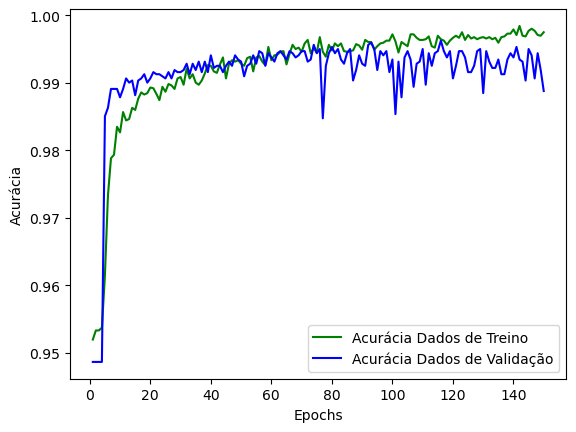

101/101 [==============================] - 0s 3ms/step


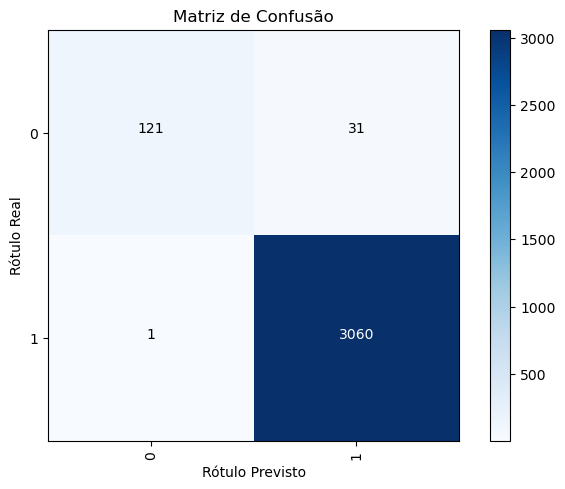

              precision    recall  f1-score   support

           0       0.99      0.80      0.88       152
           1       0.99      1.00      0.99      3061

    accuracy                           0.99      3213
   macro avg       0.99      0.90      0.94      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.8838682983235883


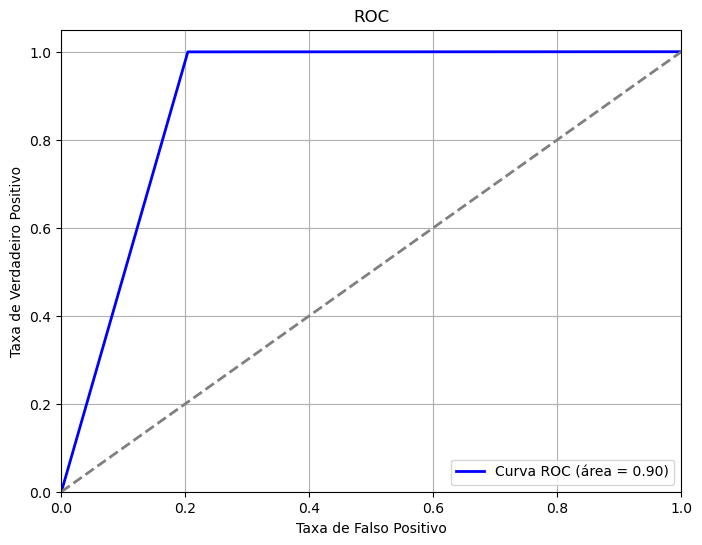

In [14]:
rede_MLP(X,y,12)

Epoch 1/150
302/302 [==============================] - 4s 8ms/step - loss: 0.2880 - acc: 0.9479 - val_loss: 0.2173 - val_acc: 0.9567
Epoch 2/150
302/302 [==============================] - 2s 8ms/step - loss: 0.2090 - acc: 0.9505 - val_loss: 0.1627 - val_acc: 0.9567
Epoch 3/150
302/302 [==============================] - 3s 8ms/step - loss: 0.1725 - acc: 0.9505 - val_loss: 0.1344 - val_acc: 0.9567
Epoch 4/150
302/302 [==============================] - 2s 7ms/step - loss: 0.1442 - acc: 0.9508 - val_loss: 0.1010 - val_acc: 0.9583
Epoch 5/150
302/302 [==============================] - 3s 8ms/step - loss: 0.1048 - acc: 0.9642 - val_loss: 0.0705 - val_acc: 0.9879
Epoch 6/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0851 - acc: 0.9719 - val_loss: 0.0586 - val_acc: 0.9897
Epoch 7/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0665 - acc: 0.9789 - val_loss: 0.0598 - val_acc: 0.9841
Epoch 8/150
302/302 [==============================] - 2s 8ms/step - 

302/302 [==============================] - 3s 8ms/step - loss: 0.0161 - acc: 0.9945 - val_loss: 0.0444 - val_acc: 0.9913
Epoch 63/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0151 - acc: 0.9938 - val_loss: 0.0411 - val_acc: 0.9916
Epoch 64/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0150 - acc: 0.9948 - val_loss: 0.0350 - val_acc: 0.9907
Epoch 65/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0118 - acc: 0.9951 - val_loss: 0.0354 - val_acc: 0.9851
Epoch 66/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0157 - acc: 0.9937 - val_loss: 0.0281 - val_acc: 0.9907
Epoch 67/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0133 - acc: 0.9958 - val_loss: 0.0304 - val_acc: 0.9907
Epoch 68/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0176 - acc: 0.9941 - val_loss: 0.0309 - val_acc: 0.9913
Epoch 69/150
302/302 [==============================] - 2s 7ms/step - loss:

302/302 [==============================] - 2s 8ms/step - loss: 0.0110 - acc: 0.9958 - val_loss: 0.0428 - val_acc: 0.9904
Epoch 124/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0102 - acc: 0.9966 - val_loss: 0.0322 - val_acc: 0.9922
Epoch 125/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0095 - acc: 0.9964 - val_loss: 0.0346 - val_acc: 0.9885
Epoch 126/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0107 - acc: 0.9961 - val_loss: 0.0485 - val_acc: 0.9916
Epoch 127/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0072 - acc: 0.9969 - val_loss: 0.0304 - val_acc: 0.9925
Epoch 128/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0093 - acc: 0.9965 - val_loss: 0.0486 - val_acc: 0.9910
Epoch 129/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0096 - acc: 0.9958 - val_loss: 0.0554 - val_acc: 0.9900
Epoch 130/150
302/302 [==============================] - 2s 7ms/step 

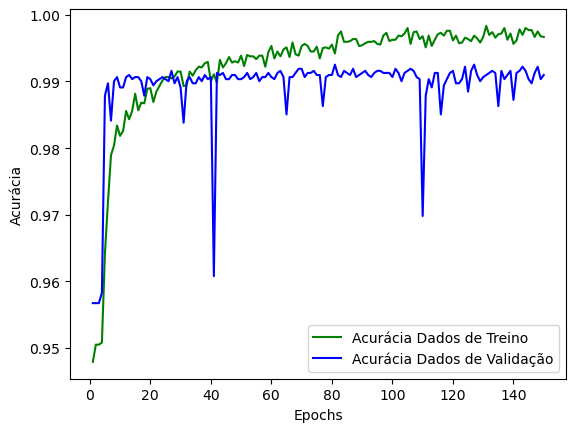

101/101 [==============================] - 0s 3ms/step


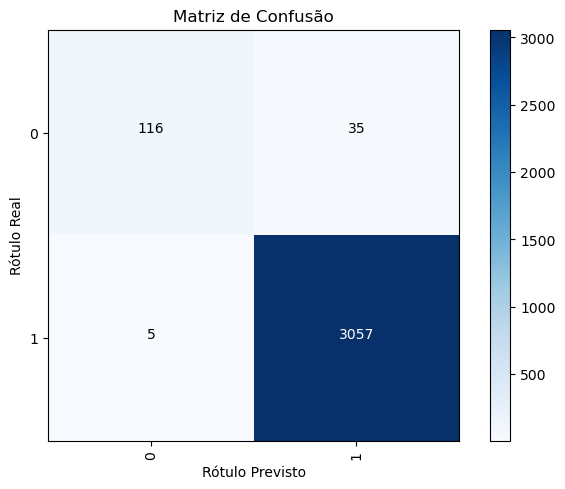

              precision    recall  f1-score   support

           0       0.96      0.77      0.85       151
           1       0.99      1.00      0.99      3062

    accuracy                           0.99      3213
   macro avg       0.97      0.88      0.92      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.8521882804706281


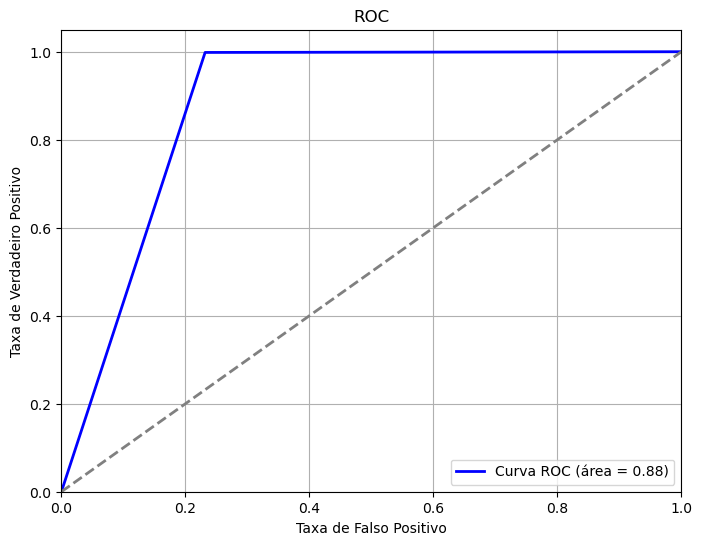

In [15]:
rede_MLP(X,y,13)

Epoch 1/150
302/302 [==============================] - 4s 9ms/step - loss: 0.2868 - acc: 0.9493 - val_loss: 0.2280 - val_acc: 0.9518
Epoch 2/150
302/302 [==============================] - 2s 8ms/step - loss: 0.2076 - acc: 0.9525 - val_loss: 0.1703 - val_acc: 0.9518
Epoch 3/150
302/302 [==============================] - 3s 8ms/step - loss: 0.1715 - acc: 0.9525 - val_loss: 0.1352 - val_acc: 0.9518
Epoch 4/150
302/302 [==============================] - 2s 7ms/step - loss: 0.1418 - acc: 0.9528 - val_loss: 0.0999 - val_acc: 0.9518
Epoch 5/150
302/302 [==============================] - 2s 7ms/step - loss: 0.1078 - acc: 0.9609 - val_loss: 0.0686 - val_acc: 0.9894
Epoch 6/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0818 - acc: 0.9743 - val_loss: 0.0528 - val_acc: 0.9907
Epoch 7/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0674 - acc: 0.9799 - val_loss: 0.0413 - val_acc: 0.9922
Epoch 8/150
302/302 [==============================] - 3s 9ms/step - 

302/302 [==============================] - 3s 9ms/step - loss: 0.0143 - acc: 0.9946 - val_loss: 0.0138 - val_acc: 0.9960
Epoch 63/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0176 - acc: 0.9935 - val_loss: 0.0148 - val_acc: 0.9950
Epoch 64/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0135 - acc: 0.9951 - val_loss: 0.0120 - val_acc: 0.9956
Epoch 65/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0182 - acc: 0.9932 - val_loss: 0.0133 - val_acc: 0.9950
Epoch 66/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0165 - acc: 0.9944 - val_loss: 0.0126 - val_acc: 0.9956
Epoch 67/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0159 - acc: 0.9949 - val_loss: 0.0206 - val_acc: 0.9941
Epoch 68/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0144 - acc: 0.9944 - val_loss: 0.0109 - val_acc: 0.9953
Epoch 69/150
302/302 [==============================] - 3s 8ms/step - loss:

302/302 [==============================] - 2s 8ms/step - loss: 0.0083 - acc: 0.9970 - val_loss: 0.0330 - val_acc: 0.9916
Epoch 124/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0102 - acc: 0.9962 - val_loss: 0.0264 - val_acc: 0.9935
Epoch 125/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0118 - acc: 0.9962 - val_loss: 0.0219 - val_acc: 0.9944
Epoch 126/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0093 - acc: 0.9967 - val_loss: 0.0249 - val_acc: 0.9922
Epoch 127/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0084 - acc: 0.9968 - val_loss: 0.0301 - val_acc: 0.9919
Epoch 128/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0110 - acc: 0.9955 - val_loss: 0.0254 - val_acc: 0.9935
Epoch 129/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0081 - acc: 0.9970 - val_loss: 0.0272 - val_acc: 0.9919
Epoch 130/150
302/302 [==============================] - 3s 9ms/step 

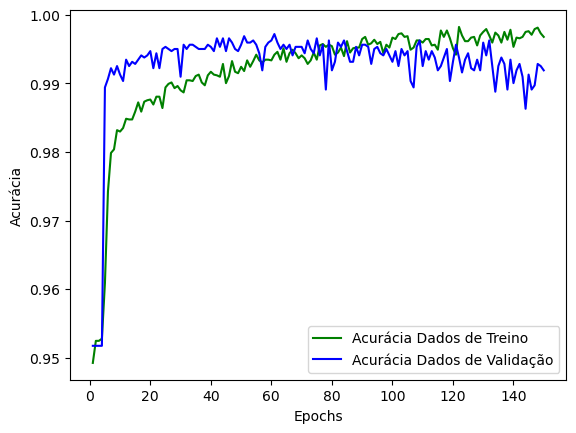

101/101 [==============================] - 0s 3ms/step


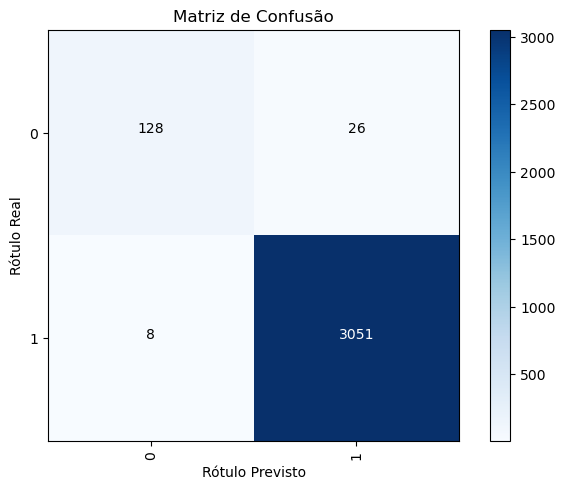

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       154
           1       0.99      1.00      0.99      3059

    accuracy                           0.99      3213
   macro avg       0.97      0.91      0.94      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.8790984288768814


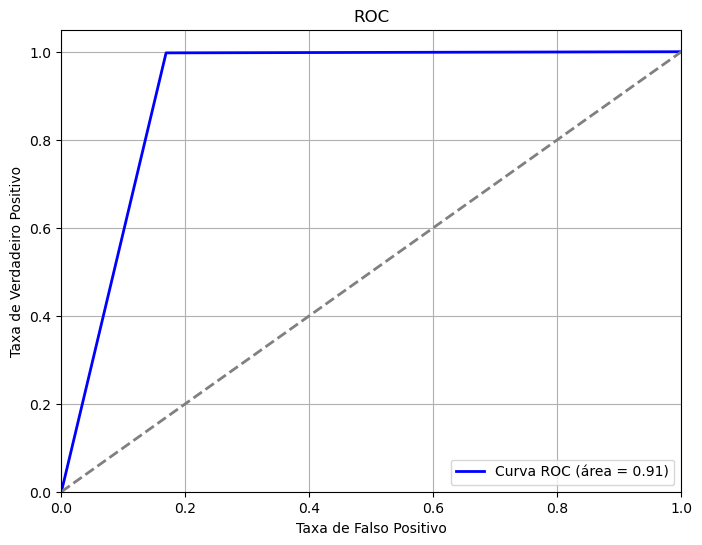

In [16]:
rede_MLP(X,y,14)

Epoch 1/150
302/302 [==============================] - 4s 9ms/step - loss: 0.2842 - acc: 0.9519 - val_loss: 0.2341 - val_acc: 0.9477
Epoch 2/150
302/302 [==============================] - 2s 8ms/step - loss: 0.2073 - acc: 0.9545 - val_loss: 0.1793 - val_acc: 0.9477
Epoch 3/150
302/302 [==============================] - 3s 9ms/step - loss: 0.1702 - acc: 0.9545 - val_loss: 0.1462 - val_acc: 0.9477
Epoch 4/150
302/302 [==============================] - 2s 7ms/step - loss: 0.1391 - acc: 0.9551 - val_loss: 0.1099 - val_acc: 0.9480
Epoch 5/150
302/302 [==============================] - 2s 7ms/step - loss: 0.1083 - acc: 0.9639 - val_loss: 0.0774 - val_acc: 0.9838
Epoch 6/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0828 - acc: 0.9742 - val_loss: 0.0630 - val_acc: 0.9863
Epoch 7/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0694 - acc: 0.9773 - val_loss: 0.0547 - val_acc: 0.9879
Epoch 8/150
302/302 [==============================] - 3s 9ms/step - 

302/302 [==============================] - 3s 8ms/step - loss: 0.0160 - acc: 0.9940 - val_loss: 0.0250 - val_acc: 0.9922
Epoch 63/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0151 - acc: 0.9952 - val_loss: 0.0333 - val_acc: 0.9922
Epoch 64/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0156 - acc: 0.9938 - val_loss: 0.0359 - val_acc: 0.9925
Epoch 65/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0165 - acc: 0.9933 - val_loss: 0.0384 - val_acc: 0.9910
Epoch 66/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0172 - acc: 0.9929 - val_loss: 0.0326 - val_acc: 0.9925
Epoch 67/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0161 - acc: 0.9937 - val_loss: 0.0310 - val_acc: 0.9922
Epoch 68/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0173 - acc: 0.9935 - val_loss: 0.0264 - val_acc: 0.9941
Epoch 69/150
302/302 [==============================] - 3s 9ms/step - loss:

302/302 [==============================] - 2s 7ms/step - loss: 0.0087 - acc: 0.9967 - val_loss: 0.0400 - val_acc: 0.9910
Epoch 124/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0111 - acc: 0.9961 - val_loss: 0.0522 - val_acc: 0.9876
Epoch 125/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0109 - acc: 0.9956 - val_loss: 0.0483 - val_acc: 0.9897
Epoch 126/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0082 - acc: 0.9971 - val_loss: 0.0561 - val_acc: 0.9888
Epoch 127/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0112 - acc: 0.9968 - val_loss: 0.0407 - val_acc: 0.9928
Epoch 128/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0085 - acc: 0.9964 - val_loss: 0.0489 - val_acc: 0.9900
Epoch 129/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0080 - acc: 0.9972 - val_loss: 0.0359 - val_acc: 0.9922
Epoch 130/150
302/302 [==============================] - 2s 7ms/step 

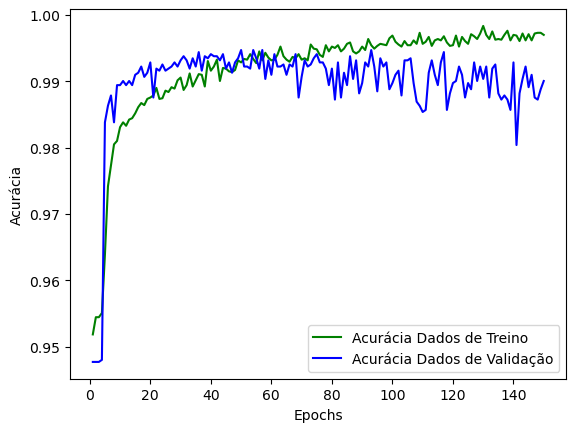

101/101 [==============================] - 0s 3ms/step


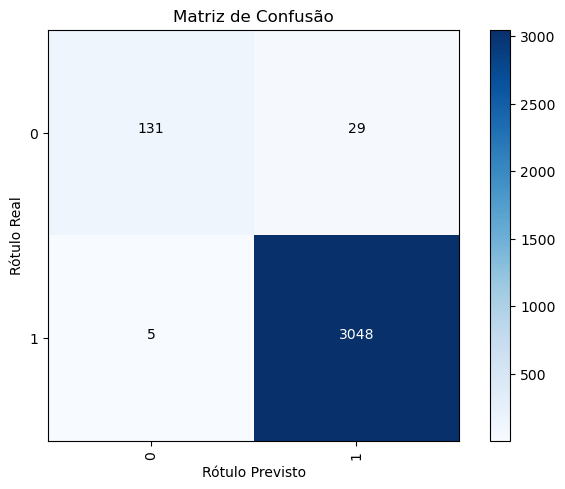

              precision    recall  f1-score   support

           0       0.96      0.82      0.89       160
           1       0.99      1.00      0.99      3053

    accuracy                           0.99      3213
   macro avg       0.98      0.91      0.94      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.882819508100087


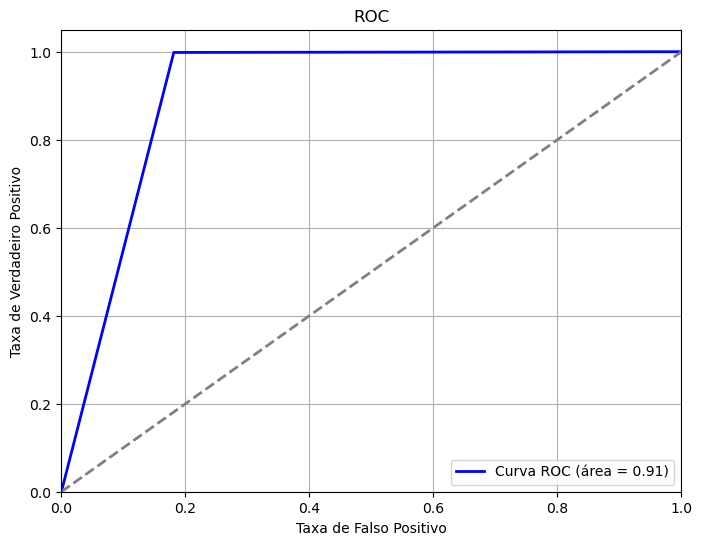

In [17]:
rede_MLP(X,y,15)

Epoch 1/150
302/302 [==============================] - 4s 9ms/step - loss: 0.2942 - acc: 0.9476 - val_loss: 0.2270 - val_acc: 0.9542
Epoch 2/150
302/302 [==============================] - 2s 8ms/step - loss: 0.2095 - acc: 0.9523 - val_loss: 0.1685 - val_acc: 0.9542
Epoch 3/150
302/302 [==============================] - 2s 8ms/step - loss: 0.1747 - acc: 0.9523 - val_loss: 0.1379 - val_acc: 0.9542
Epoch 4/150
302/302 [==============================] - 2s 8ms/step - loss: 0.1489 - acc: 0.9521 - val_loss: 0.1112 - val_acc: 0.9542
Epoch 5/150
302/302 [==============================] - 2s 7ms/step - loss: 0.1170 - acc: 0.9586 - val_loss: 0.0821 - val_acc: 0.9767
Epoch 6/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0859 - acc: 0.9709 - val_loss: 0.0640 - val_acc: 0.9888
Epoch 7/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0717 - acc: 0.9745 - val_loss: 0.0549 - val_acc: 0.9885
Epoch 8/150
302/302 [==============================] - 2s 8ms/step - 

302/302 [==============================] - 2s 8ms/step - loss: 0.0192 - acc: 0.9924 - val_loss: 0.0352 - val_acc: 0.9928
Epoch 63/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0147 - acc: 0.9934 - val_loss: 0.0215 - val_acc: 0.9932
Epoch 64/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0163 - acc: 0.9934 - val_loss: 0.0401 - val_acc: 0.9925
Epoch 65/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0161 - acc: 0.9942 - val_loss: 0.0202 - val_acc: 0.9932
Epoch 66/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0170 - acc: 0.9932 - val_loss: 0.0350 - val_acc: 0.9925
Epoch 67/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0177 - acc: 0.9940 - val_loss: 0.0329 - val_acc: 0.9925
Epoch 68/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0152 - acc: 0.9944 - val_loss: 0.0285 - val_acc: 0.9935
Epoch 69/150
302/302 [==============================] - 2s 8ms/step - loss:

302/302 [==============================] - 2s 8ms/step - loss: 0.0128 - acc: 0.9948 - val_loss: 0.0582 - val_acc: 0.9860
Epoch 124/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0073 - acc: 0.9975 - val_loss: 0.0439 - val_acc: 0.9916
Epoch 125/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0101 - acc: 0.9963 - val_loss: 0.0449 - val_acc: 0.9907
Epoch 126/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0071 - acc: 0.9977 - val_loss: 0.0345 - val_acc: 0.9935
Epoch 127/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0066 - acc: 0.9978 - val_loss: 0.0354 - val_acc: 0.9938
Epoch 128/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0103 - acc: 0.9958 - val_loss: 0.0385 - val_acc: 0.9916
Epoch 129/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0127 - acc: 0.9954 - val_loss: 0.0331 - val_acc: 0.9932
Epoch 130/150
302/302 [==============================] - 2s 8ms/step 

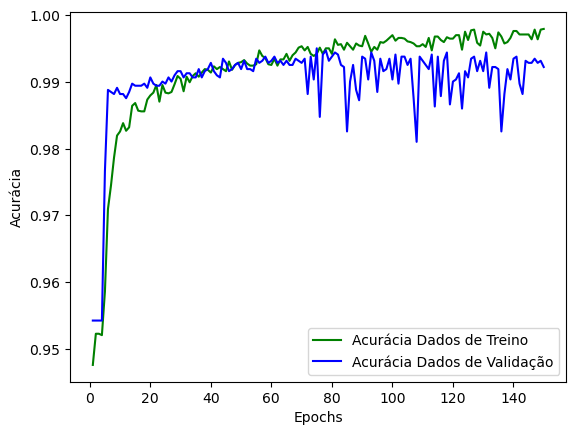

101/101 [==============================] - 1s 4ms/step


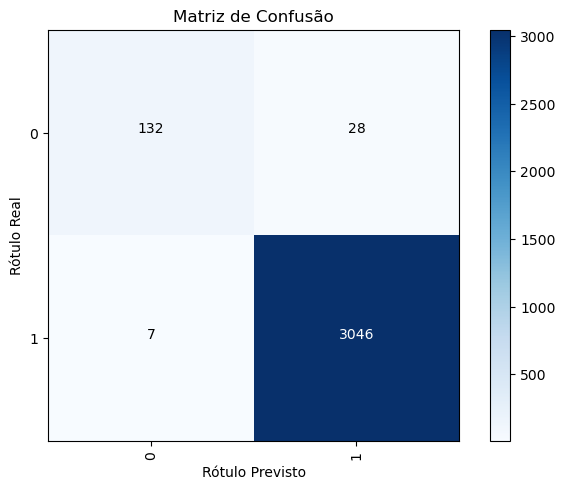

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       160
           1       0.99      1.00      0.99      3053

    accuracy                           0.99      3213
   macro avg       0.97      0.91      0.94      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.8796488631454407


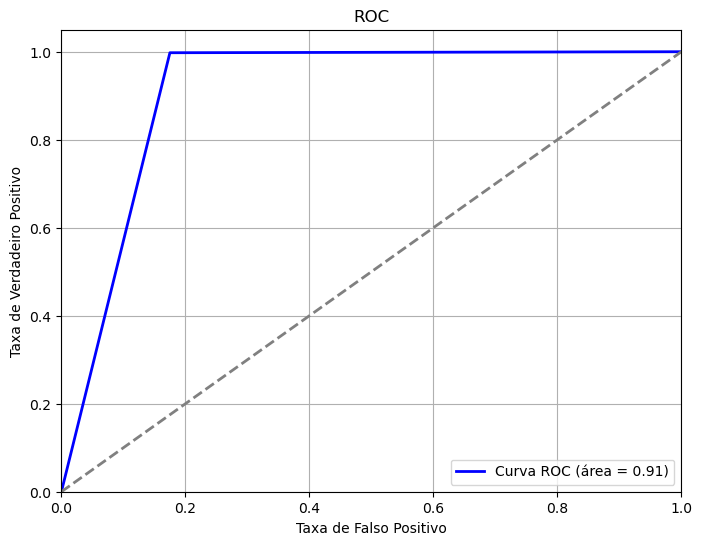

In [18]:
rede_MLP(X,y,16)

Epoch 1/150
302/302 [==============================] - 4s 9ms/step - loss: 0.2936 - acc: 0.9514 - val_loss: 0.2536 - val_acc: 0.9521
Epoch 2/150
302/302 [==============================] - 2s 7ms/step - loss: 0.2170 - acc: 0.9521 - val_loss: 0.1910 - val_acc: 0.9521
Epoch 3/150
302/302 [==============================] - 2s 8ms/step - loss: 0.1844 - acc: 0.9521 - val_loss: 0.1552 - val_acc: 0.9521
Epoch 4/150
302/302 [==============================] - 2s 7ms/step - loss: 0.1624 - acc: 0.9521 - val_loss: 0.1370 - val_acc: 0.9521
Epoch 5/150
302/302 [==============================] - 3s 8ms/step - loss: 0.1455 - acc: 0.9520 - val_loss: 0.1107 - val_acc: 0.9521
Epoch 6/150
302/302 [==============================] - 3s 8ms/step - loss: 0.1189 - acc: 0.9550 - val_loss: 0.0807 - val_acc: 0.9767
Epoch 7/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0865 - acc: 0.9703 - val_loss: 0.0609 - val_acc: 0.9894
Epoch 8/150
302/302 [==============================] - 2s 7ms/step - 

302/302 [==============================] - 2s 6ms/step - loss: 0.0146 - acc: 0.9946 - val_loss: 0.0233 - val_acc: 0.9928
Epoch 63/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0136 - acc: 0.9953 - val_loss: 0.0202 - val_acc: 0.9932
Epoch 64/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0157 - acc: 0.9934 - val_loss: 0.0268 - val_acc: 0.9925
Epoch 65/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0168 - acc: 0.9939 - val_loss: 0.0224 - val_acc: 0.9928
Epoch 66/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0130 - acc: 0.9947 - val_loss: 0.0273 - val_acc: 0.9935
Epoch 67/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0174 - acc: 0.9936 - val_loss: 0.0202 - val_acc: 0.9922
Epoch 68/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0189 - acc: 0.9938 - val_loss: 0.0207 - val_acc: 0.9928
Epoch 69/150
302/302 [==============================] - 2s 7ms/step - loss:

302/302 [==============================] - 2s 7ms/step - loss: 0.0089 - acc: 0.9964 - val_loss: 0.0310 - val_acc: 0.9916
Epoch 124/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0071 - acc: 0.9974 - val_loss: 0.0299 - val_acc: 0.9928
Epoch 125/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0067 - acc: 0.9978 - val_loss: 0.0346 - val_acc: 0.9922
Epoch 126/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0091 - acc: 0.9969 - val_loss: 0.0306 - val_acc: 0.9922
Epoch 127/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0069 - acc: 0.9970 - val_loss: 0.0347 - val_acc: 0.9910
Epoch 128/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0071 - acc: 0.9980 - val_loss: 0.0372 - val_acc: 0.9913
Epoch 129/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0075 - acc: 0.9973 - val_loss: 0.0174 - val_acc: 0.9938
Epoch 130/150
302/302 [==============================] - 2s 8ms/step 

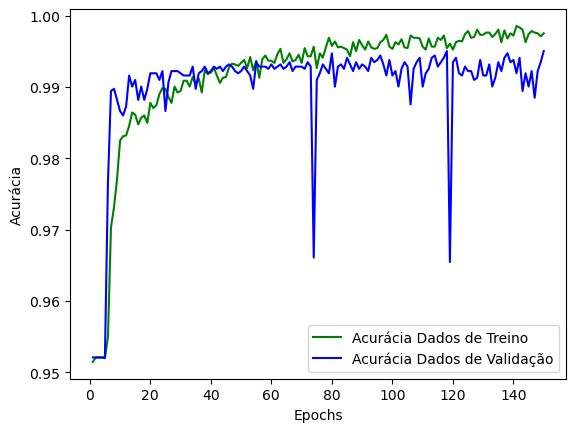

101/101 [==============================] - 0s 3ms/step


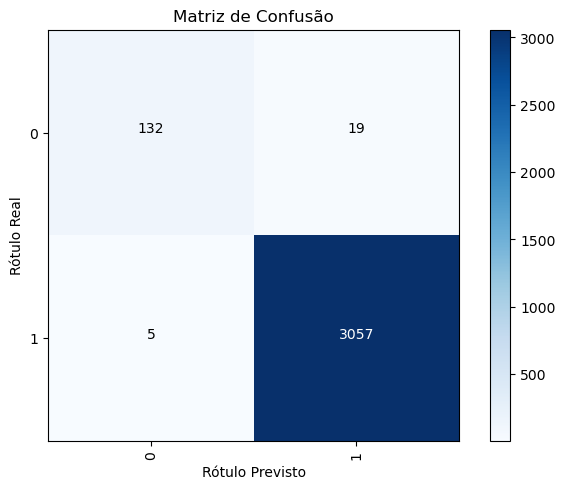

              precision    recall  f1-score   support

           0       0.96      0.87      0.92       151
           1       0.99      1.00      1.00      3062

    accuracy                           0.99      3213
   macro avg       0.98      0.94      0.96      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.9139503379227983


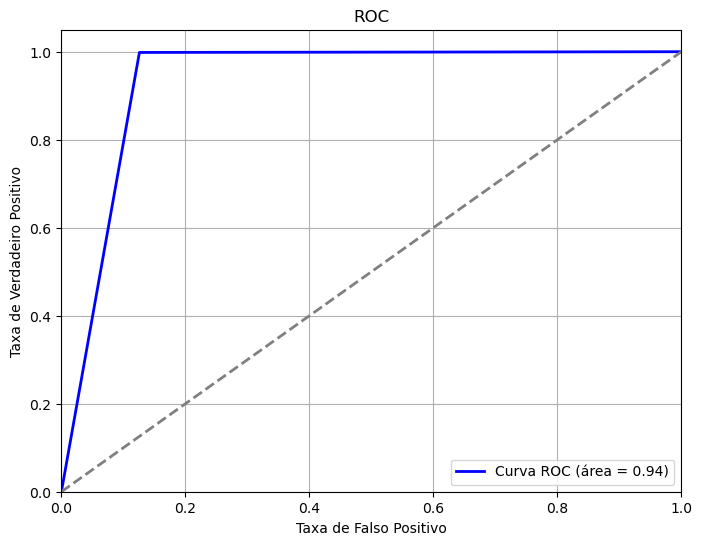

In [19]:
rede_MLP(X,y,17)

Epoch 1/150
302/302 [==============================] - 4s 8ms/step - loss: 0.2927 - acc: 0.9509 - val_loss: 0.2398 - val_acc: 0.9536
Epoch 2/150
302/302 [==============================] - 2s 7ms/step - loss: 0.2163 - acc: 0.9518 - val_loss: 0.1816 - val_acc: 0.9536
Epoch 3/150
302/302 [==============================] - 2s 7ms/step - loss: 0.1810 - acc: 0.9518 - val_loss: 0.1487 - val_acc: 0.9536
Epoch 4/150
302/302 [==============================] - 2s 7ms/step - loss: 0.1552 - acc: 0.9518 - val_loss: 0.1174 - val_acc: 0.9536
Epoch 5/150
302/302 [==============================] - 2s 8ms/step - loss: 0.1248 - acc: 0.9561 - val_loss: 0.0871 - val_acc: 0.9707
Epoch 6/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0961 - acc: 0.9669 - val_loss: 0.0674 - val_acc: 0.9863
Epoch 7/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0785 - acc: 0.9741 - val_loss: 0.0586 - val_acc: 0.9866
Epoch 8/150
302/302 [==============================] - 2s 8ms/step - 

302/302 [==============================] - 2s 8ms/step - loss: 0.0139 - acc: 0.9945 - val_loss: 0.0354 - val_acc: 0.9910
Epoch 63/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0165 - acc: 0.9938 - val_loss: 0.0329 - val_acc: 0.9907
Epoch 64/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0160 - acc: 0.9938 - val_loss: 0.0380 - val_acc: 0.9913
Epoch 65/150
302/302 [==============================] - 2s 6ms/step - loss: 0.0156 - acc: 0.9938 - val_loss: 0.0330 - val_acc: 0.9910
Epoch 66/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0163 - acc: 0.9938 - val_loss: 0.0228 - val_acc: 0.9910
Epoch 67/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0172 - acc: 0.9938 - val_loss: 0.0414 - val_acc: 0.9894
Epoch 68/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0152 - acc: 0.9946 - val_loss: 0.0417 - val_acc: 0.9910
Epoch 69/150
302/302 [==============================] - 2s 7ms/step - loss:

302/302 [==============================] - 2s 7ms/step - loss: 0.0097 - acc: 0.9967 - val_loss: 0.0634 - val_acc: 0.9888
Epoch 124/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0084 - acc: 0.9974 - val_loss: 0.0639 - val_acc: 0.9894
Epoch 125/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0109 - acc: 0.9958 - val_loss: 0.0835 - val_acc: 0.9804
Epoch 126/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0072 - acc: 0.9976 - val_loss: 0.0608 - val_acc: 0.9860
Epoch 127/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0083 - acc: 0.9969 - val_loss: 0.0610 - val_acc: 0.9863
Epoch 128/150
302/302 [==============================] - 2s 6ms/step - loss: 0.0093 - acc: 0.9968 - val_loss: 0.0566 - val_acc: 0.9879
Epoch 129/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0093 - acc: 0.9974 - val_loss: 0.0518 - val_acc: 0.9888
Epoch 130/150
302/302 [==============================] - 2s 7ms/step 

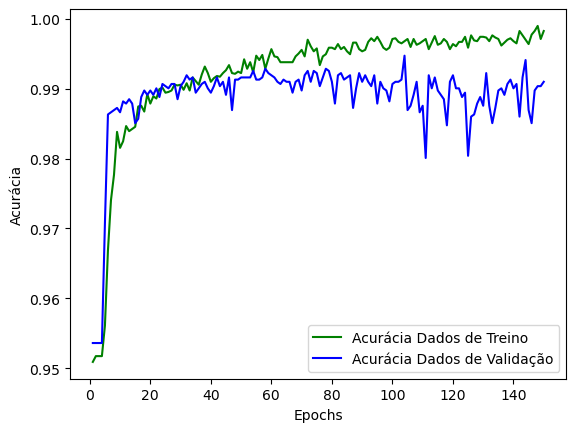

101/101 [==============================] - 0s 2ms/step


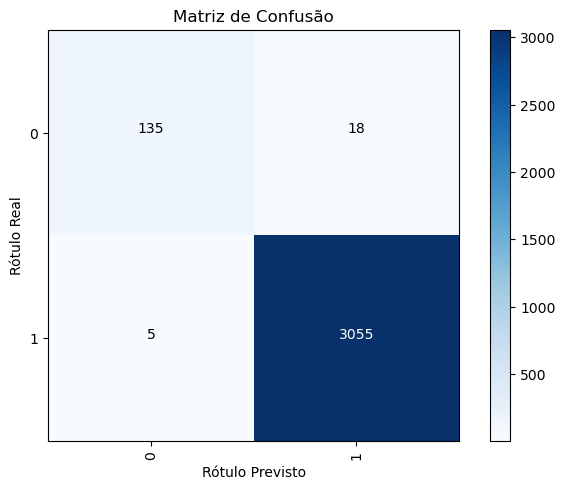

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       153
           1       0.99      1.00      1.00      3060

    accuracy                           0.99      3213
   macro avg       0.98      0.94      0.96      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.9187523728139443


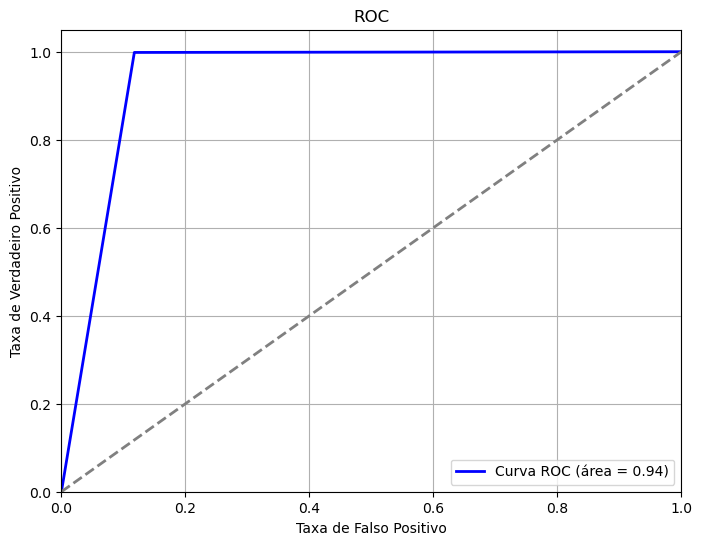

In [20]:
rede_MLP(X,y,18)

Epoch 1/150
302/302 [==============================] - 4s 8ms/step - loss: 0.2954 - acc: 0.9486 - val_loss: 0.2427 - val_acc: 0.9533
Epoch 2/150
302/302 [==============================] - 3s 9ms/step - loss: 0.2182 - acc: 0.9495 - val_loss: 0.1767 - val_acc: 0.9533
Epoch 3/150
302/302 [==============================] - 2s 7ms/step - loss: 0.1817 - acc: 0.9495 - val_loss: 0.1413 - val_acc: 0.9533
Epoch 4/150
302/302 [==============================] - 2s 8ms/step - loss: 0.1477 - acc: 0.9495 - val_loss: 0.1045 - val_acc: 0.9530
Epoch 5/150
302/302 [==============================] - 2s 7ms/step - loss: 0.1105 - acc: 0.9619 - val_loss: 0.0730 - val_acc: 0.9882
Epoch 6/150
302/302 [==============================] - 2s 6ms/step - loss: 0.0816 - acc: 0.9766 - val_loss: 0.0548 - val_acc: 0.9910
Epoch 7/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0733 - acc: 0.9769 - val_loss: 0.0478 - val_acc: 0.9904
Epoch 8/150
302/302 [==============================] - 3s 8ms/step - 

302/302 [==============================] - 2s 8ms/step - loss: 0.0194 - acc: 0.9923 - val_loss: 0.0229 - val_acc: 0.9935
Epoch 63/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0189 - acc: 0.9938 - val_loss: 0.0282 - val_acc: 0.9932
Epoch 64/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0143 - acc: 0.9947 - val_loss: 0.0262 - val_acc: 0.9932
Epoch 65/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0136 - acc: 0.9953 - val_loss: 0.0248 - val_acc: 0.9935
Epoch 66/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0158 - acc: 0.9942 - val_loss: 0.0405 - val_acc: 0.9922
Epoch 67/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0144 - acc: 0.9953 - val_loss: 0.0323 - val_acc: 0.9925
Epoch 68/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0160 - acc: 0.9940 - val_loss: 0.0358 - val_acc: 0.9907
Epoch 69/150
302/302 [==============================] - 2s 8ms/step - loss:

302/302 [==============================] - 3s 8ms/step - loss: 0.0082 - acc: 0.9971 - val_loss: 0.0434 - val_acc: 0.9904
Epoch 124/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0059 - acc: 0.9984 - val_loss: 0.0403 - val_acc: 0.9916
Epoch 125/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0044 - acc: 0.9982 - val_loss: 0.0520 - val_acc: 0.9907
Epoch 126/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0058 - acc: 0.9980 - val_loss: 0.0442 - val_acc: 0.9922
Epoch 127/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0058 - acc: 0.9979 - val_loss: 0.0376 - val_acc: 0.9916
Epoch 128/150
302/302 [==============================] - 3s 8ms/step - loss: 0.0051 - acc: 0.9979 - val_loss: 0.0521 - val_acc: 0.9900
Epoch 129/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0057 - acc: 0.9982 - val_loss: 0.0393 - val_acc: 0.9916
Epoch 130/150
302/302 [==============================] - 2s 7ms/step 

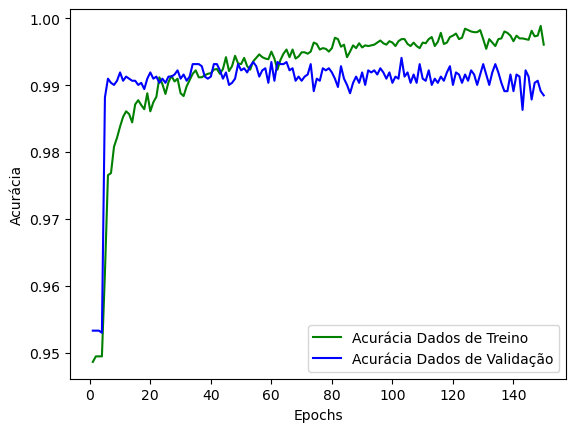

101/101 [==============================] - 0s 3ms/step


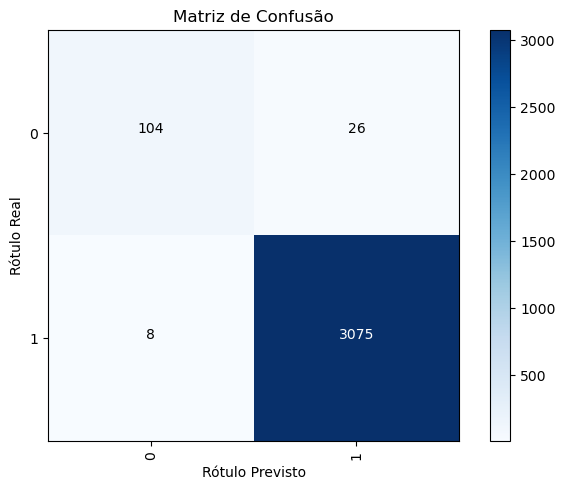

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       130
           1       0.99      1.00      0.99      3083

    accuracy                           0.99      3213
   macro avg       0.96      0.90      0.93      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.8565990069476954


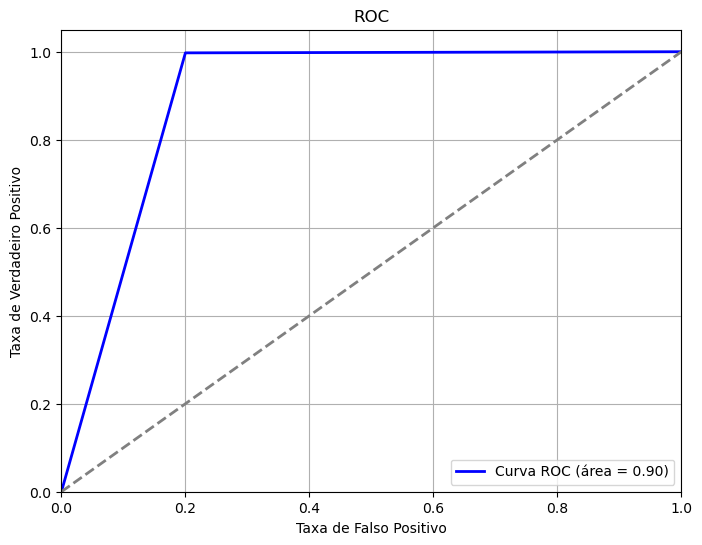

In [21]:
rede_MLP(X,y,19)

Epoch 1/150
302/302 [==============================] - 4s 9ms/step - loss: 0.2882 - acc: 0.9515 - val_loss: 0.2379 - val_acc: 0.9502
Epoch 2/150
302/302 [==============================] - 2s 7ms/step - loss: 0.2063 - acc: 0.9534 - val_loss: 0.1712 - val_acc: 0.9502
Epoch 3/150
302/302 [==============================] - 2s 6ms/step - loss: 0.1648 - acc: 0.9533 - val_loss: 0.1250 - val_acc: 0.9502
Epoch 4/150
302/302 [==============================] - 2s 8ms/step - loss: 0.1223 - acc: 0.9607 - val_loss: 0.0824 - val_acc: 0.9835
Epoch 5/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0914 - acc: 0.9702 - val_loss: 0.0682 - val_acc: 0.9860
Epoch 6/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0762 - acc: 0.9760 - val_loss: 0.0537 - val_acc: 0.9894
Epoch 7/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0628 - acc: 0.9795 - val_loss: 0.0479 - val_acc: 0.9897
Epoch 8/150
302/302 [==============================] - 2s 7ms/step - 

302/302 [==============================] - 2s 7ms/step - loss: 0.0158 - acc: 0.9942 - val_loss: 0.0282 - val_acc: 0.9932
Epoch 63/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0189 - acc: 0.9938 - val_loss: 0.0297 - val_acc: 0.9916
Epoch 64/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0182 - acc: 0.9936 - val_loss: 0.0299 - val_acc: 0.9925
Epoch 65/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0178 - acc: 0.9937 - val_loss: 0.0243 - val_acc: 0.9941
Epoch 66/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0176 - acc: 0.9934 - val_loss: 0.0234 - val_acc: 0.9941
Epoch 67/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0171 - acc: 0.9932 - val_loss: 0.0248 - val_acc: 0.9925
Epoch 68/150
302/302 [==============================] - 3s 9ms/step - loss: 0.0160 - acc: 0.9930 - val_loss: 0.0319 - val_acc: 0.9925
Epoch 69/150
302/302 [==============================] - 3s 8ms/step - loss:

302/302 [==============================] - 2s 7ms/step - loss: 0.0081 - acc: 0.9976 - val_loss: 0.0481 - val_acc: 0.9894
Epoch 124/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0095 - acc: 0.9965 - val_loss: 0.0421 - val_acc: 0.9907
Epoch 125/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0092 - acc: 0.9960 - val_loss: 0.0458 - val_acc: 0.9894
Epoch 126/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0087 - acc: 0.9973 - val_loss: 0.0572 - val_acc: 0.9872
Epoch 127/150
302/302 [==============================] - 2s 8ms/step - loss: 0.0088 - acc: 0.9970 - val_loss: 0.0697 - val_acc: 0.9851
Epoch 128/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0095 - acc: 0.9972 - val_loss: 0.0438 - val_acc: 0.9910
Epoch 129/150
302/302 [==============================] - 2s 7ms/step - loss: 0.0081 - acc: 0.9971 - val_loss: 0.0469 - val_acc: 0.9894
Epoch 130/150
302/302 [==============================] - 2s 8ms/step 

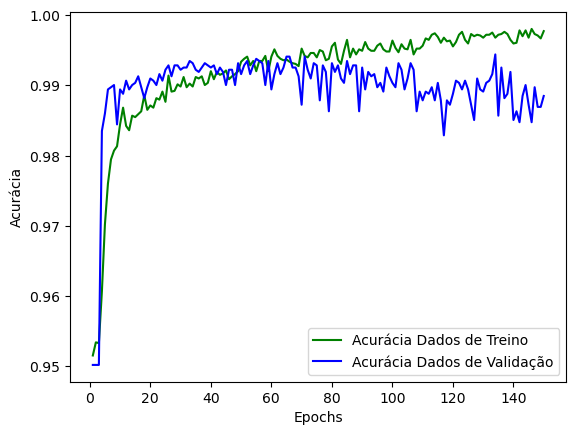

101/101 [==============================] - 0s 3ms/step


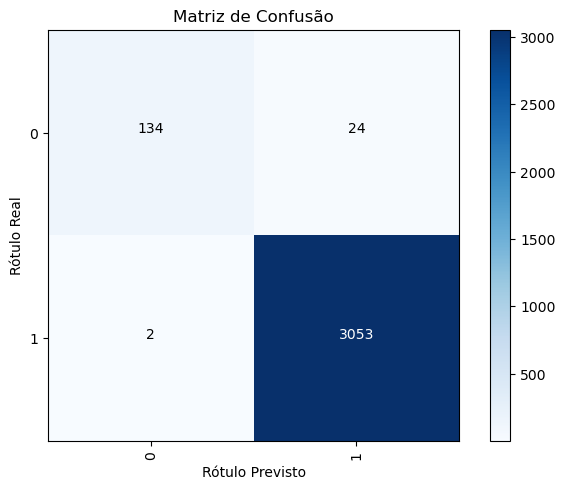

              precision    recall  f1-score   support

           0       0.99      0.85      0.91       158
           1       0.99      1.00      1.00      3055

    accuracy                           0.99      3213
   macro avg       0.99      0.92      0.95      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.9101506650418758


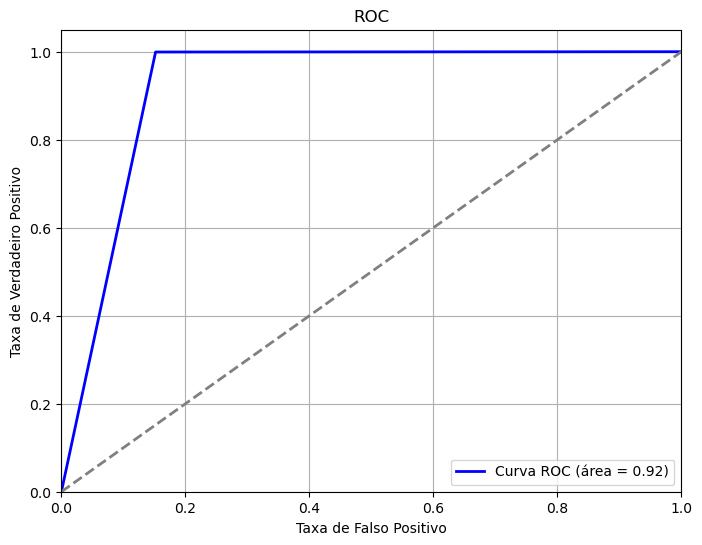

In [22]:
rede_MLP(X,y,20)